In [1]:
#a code block that deals with concentration and drug names
#we do not use this block for now.
#Dna ： etoposide，Gemcitabine
#mt：paclitaxel，Vinblastine
#hsp：17aag，auy922

#prot："MG132"，ps341
#hdac：saha，apicidin
#cross_class 

import pandas as pd
f1 = pd.read_csv('B_ks2.csv')
f2 = pd.read_csv('C_ks2.csv')
f3=pd.read_csv('D_ks2.csv')
f4=pd.read_csv('E_ks2.csv')
f5=pd.read_csv('A_ks2.csv')
file = [f1,f2,f3,f5]
train = pd.concat(file,axis=1)
train.to_csv("train.csv", index=0, sep=',')


In [2]:
#do some further processing with "A" because there are some data error in it
def remove_extradots(string):
    counter=0
    lst=[]
    for i in range(len(string)):
        if string[i]=='.' and counter<1 :
            lst.append(string[i])
            counter+=1
        elif string[i]!='.':
            lst.append(string[i])
    res="".join(lst)
    return res



import csv
res_list=[]
print(remove_extradots("-0.29444.2"))
with open('A_ks2.csv') as file2:
    reader=csv.reader(file2)

    for row in reader:
        data=[]
        for i in range(len(row)):
            
            data.append(remove_extradots(row[i]))
        res_list.append(data)
    


with open('modified_A.csv', 'w') as file3:
    writer = csv.writer(file3)
    writer.writerows(res_list)
file3.close()
                


-0.294442


In [3]:
#test file A
import pandas as pd
df_A=pd.read_csv("A_ks2.csv")
df_A.shape
#df_A2=pd.read_csv("A_modified.csv")
#df_A2.shape


(1535, 239)

In [4]:
#a block that is used to concate the drug names(drug combinations and related concentration)

import csv
res_list=[]
with open('train.csv', 'r') as file:
    reader = csv.reader(file)
    
    for row in reader:
        data=[]
        data.append(row[0]+'+'+row[1]+"+"+row[2])
        res_list.append(data)

        
        
with open('concatenated.csv', 'w') as file2:
    writer = csv.writer(file2)
    writer.writerows(res_list)

In [5]:
#a block that is used to concate concentration and ks numbers.
import pandas as pd
f1 = pd.read_csv('concatenated.csv')
#f2 = pd.read_csv('C.csv')
f3=pd.read_csv('D_ks2.csv')
f4=pd.read_csv('E_ks2.csv')
f5=pd.read_csv('modified_A.csv')
file = [f1,f5]
train = pd.concat(file,axis=1)
train.to_csv("train3.csv", index=0, sep=',')

In [6]:
#a block that sets the fields for the drug data
import csv
fields=['drug_name','default']
for i in range(1,239):
    fields.append('ks'+str(i))
rows=[]
with open('train3.csv', 'r') as file:
    reader = csv.reader(file)
    
    for row in reader:
        rows.append(row)

        
        
with open('drug_withfields2.csv', 'w') as file2:
    writer = csv.writer(file2)
    writer.writerow(fields)
    writer.writerows(rows)

In [7]:
#do some further processing with "drug_withfields" because there are still some data error in it
def remove_extradots(string):
    counter=0
    lst=[]
    for i in range(len(string)):
        if string[i]=='.' and counter<1 :
            lst.append(string[i])
            counter+=1
        elif string[i]!='.':
            lst.append(string[i])
    res="".join(lst)
    return res



import csv
res_list=[]
print(remove_extradots("-0.29444.2"))
with open('drug_withfields2.csv') as file2:
    reader=csv.reader(file2)

    for row in reader:
        data=[]
        for i in range(len(row)):
            
            data.append(remove_extradots(row[i]))
        res_list.append(data)
    


with open('drug_with_fields.csv', 'w') as file3:
    writer = csv.writer(file3)
    writer.writerows(res_list)
file3.close()
                

-0.294442


In [8]:
df=pd.read_csv('drug_with_fields.csv')
#one type first type. dna
df11=df.loc[(df['drug_name'] =='Etoposide+Gemcitabine+1') ]
df12=df.loc[(df['drug_name'] =='Etoposide+Gemcitabine+2') ]

df21=df.loc[(df['drug_name'] =='Gemcitabine+Etoposide+1') ]
df22=df.loc[(df['drug_name'] =='Gemcitabine+Etoposide+2') ]

df31=df.loc[(df['drug_name'] =='Etoposide+Etoposide+1') ]
df32=df.loc[(df['drug_name'] =='Etoposide+Etoposide+2') ]

df41=df.loc[(df['drug_name'] =='Gemcitabine+Gemcitabine+1') ]
df42=df.loc[(df['drug_name'] =='Gemcitabine+Gemcitabine+2') ]

df51=df.loc[(df['drug_name'] =='Gemcitabine+DMSO+1') ]
df52=df.loc[(df['drug_name'] =='Gemcitabine+DMSO+2') ]



df61=df.loc[(df['drug_name'] =='Etoposide+DMSO+1') ]
df62=df.loc[(df['drug_name'] =='Etoposide+DMSO+2') ]



frames = [df11, df12,df21,df22,df31,df32,df41,df42,df51,df52,df61,df62]
dna = pd.concat(frames)
dna



,drug_name,default,ks1,ks2,ks3,ks4,ks5,ks6,ks7,ks8,...,ks229,ks230,ks231,ks232,ks233,ks234,ks235,ks236,ks237,ks238
288,Gemcitabine+Etoposide+1,0,-0.37625,-0.239770,-0.472950,0.272120,-0.405750,-0.503060,-0.456620,-0.454380,...,0.309020,0.098262,0.087180,0.399560,0.409440,0.098262,-0.308850,-0.227210,0.098363,-0.091499
289,Gemcitabine+Etoposide+1,0,-0.30750,0.084427,-0.217620,0.361410,-0.148340,-0.246130,-0.205880,-0.194610,...,0.314070,0.058262,-0.141980,0.355410,0.380740,0.058262,-0.132720,-0.186760,0.078267,0.094994
312,Gemcitabine+Etoposide+1,0,-0.40083,-0.130780,-0.355410,0.374890,-0.284660,-0.363750,-0.341210,-0.338950,...,0.299810,0.085338,-0.077312,0.363630,0.383620,0.085338,-0.211410,-0.194220,0.077165,0.084654
313,Gemcitabine+Etoposide+1,0,-0.36125,-0.268510,-0.500130,0.181460,-0.408660,-0.504910,-0.482440,-0.487010,...,0.282460,0.126550,0.074616,0.374620,0.377060,0.126550,-0.305530,-0.230910,0.058352,-0.081113
290,Gemcitabine+Etoposide+2,0,-0.39000,-0.074998,-0.244910,0.259660,-0.177040,-0.263640,-0.233270,-0.225690,...,0.253050,0.160250,-0.146910,0.385550,0.390930,0.160250,-0.221980,-0.241610,0.059718,0.144270
291,Gemcitabine+Etoposide+2,0,-0.43083,0.296090,0.133160,0.268950,0.241030,-0.068173,0.137450,0.165820,...,0.319190,0.132600,-0.381990,0.438990,0.397330,0.132600,-0.121590,-0.363650,-0.054031,0.344040
314,Gemcitabine+Etoposide+2,0,-0.24625,0.185470,-0.092140,0.235070,0.144350,-0.110970,-0.089130,-0.081101,...,0.265940,0.086148,-0.197240,0.363110,0.344770,0.086148,-0.131960,-0.207270,0.075003,0.155320
315,Gemcitabine+Etoposide+2,0,-0.28042,0.289890,0.133600,0.204580,0.206040,0.105150,0.125610,0.147320,...,0.276900,0.066092,-0.275150,0.355990,0.347880,0.066092,-0.092421,-0.247980,0.074752,0.236420
1260,Etoposide+Etoposide+1,0,-0.87250,0.430230,0.261280,0.266420,0.266220,0.239780,0.233630,0.220140,...,0.637980,0.104290,-0.218610,0.663860,0.662250,0.104290,-0.495060,-0.479380,-0.079277,0.201210
1261,Etoposide+Etoposide+1,0,-0.64125,0.469260,0.331120,0.251450,0.549360,0.363800,0.289990,0.292180,...,0.656250,-0.037638,0.073717,0.664790,0.706310,-0.037638,-0.416960,-0.328540,0.123200,-0.073301


In [9]:

#one type first type. mt
df11=df.loc[(df['drug_name'] =='Paclitaxel+Vinblastine+1') ]
df12=df.loc[(df['drug_name'] =='Paclitaxel+Vinblastine+2') ]

df21=df.loc[(df['drug_name'] =='Vinblastine+Paclitaxel+1') ]
df22=df.loc[(df['drug_name'] =='Vinblastine+Paclitaxel+2') ]

df31=df.loc[(df['drug_name'] =='Paclitaxel+Paclitaxel+1') ]
df32=df.loc[(df['drug_name'] =='Paclitaxel+Paclitaxel+2') ]

df41=df.loc[(df['drug_name'] =='Vinblastine+Vinblastine+1') ]
df42=df.loc[(df['drug_name'] =='Vinblastine+Vinblastine+2') ]

df51=df.loc[(df['drug_name'] =='Paclitaxel+DMSO+1') ]
df52=df.loc[(df['drug_name'] =='Paclitaxel+DMSO+2') ]

df61=df.loc[(df['drug_name'] =='Vinblastine+DMSO+1') ]
df62=df.loc[(df['drug_name'] =='Vinblastine+DMSO+2') ]



frames2 = [df11, df12,df21,df22,df31,df32,df41,df42,df51,df52,df61,df62]
mt= pd.concat(frames2)
mt
#print(len(dna),len(mt))




,drug_name,default,ks1,ks2,ks3,ks4,ks5,ks6,ks7,ks8,...,ks229,ks230,ks231,ks232,ks233,ks234,ks235,ks236,ks237,ks238
588,Paclitaxel+Vinblastine+1,0,-0.27500,-0.258880,-0.086688,-0.13499,-0.609590,-0.31824,-0.040134,0.170860,...,-0.491700,-0.354070,0.479210,-0.613880,-0.562220,-0.354070,0.252810,0.34045,0.124720,-0.403240
589,Paclitaxel+Vinblastine+1,0,-0.20375,-0.267970,-0.136310,-0.13175,-0.602510,-0.36357,-0.084163,0.123060,...,-0.458200,-0.295470,0.355350,-0.572110,-0.533500,-0.295470,0.300800,0.33152,-0.124960,-0.305200
612,Paclitaxel+Vinblastine+1,0,-0.49583,-0.346390,-0.183470,-0.19861,-0.716530,-0.41583,-0.111670,0.095139,...,-0.412780,-0.322500,0.439310,-0.563190,-0.490970,-0.322500,0.084583,0.23569,-0.145280,-0.361390
613,Paclitaxel+Vinblastine+1,0,-0.53167,-0.304310,-0.166310,-0.16731,-0.674520,-0.40416,-0.091777,0.114900,...,-0.526330,-0.393490,0.479940,-0.673610,-0.621960,-0.393490,0.311120,0.40126,0.146710,-0.404640
590,Paclitaxel+Vinblastine+2,0,-0.27583,-0.142300,-0.156530,0.14773,-0.404610,-0.37457,-0.115130,0.106660,...,-0.293980,-0.201980,0.321560,-0.414440,-0.372200,-0.201980,0.357930,0.36082,0.101260,-0.330120
591,Paclitaxel+Vinblastine+2,0,-0.32125,-0.265340,-0.346260,-0.12321,-0.615680,-0.52210,-0.293780,-0.173460,...,-0.246290,-0.166910,0.417880,-0.382160,-0.319690,-0.166910,0.207590,0.31664,-0.095242,-0.401950
614,Paclitaxel+Vinblastine+2,0,-0.24792,-0.239510,-0.275520,-0.11819,-0.567600,-0.47661,-0.219540,-0.087308,...,-0.348340,-0.152310,0.348300,-0.435810,-0.421400,-0.152310,0.290980,0.32866,-0.106830,-0.361730
615,Paclitaxel+Vinblastine+2,0,-0.23958,-0.230550,-0.257150,-0.13883,-0.567190,-0.48083,-0.221390,-0.066476,...,-0.318830,-0.228960,0.349790,-0.413660,-0.381170,-0.228960,0.260620,0.31303,0.105120,-0.366120
1164,Paclitaxel+Paclitaxel+1,0,-0.75917,-0.581090,-0.394530,-0.39493,-0.802460,-0.53512,-0.317220,-0.180090,...,-0.230990,-0.235670,-0.253790,-0.300640,-0.372380,-0.235670,-0.255010,-0.28872,-0.285860,0.290920
1165,Paclitaxel+Paclitaxel+1,0,-0.76292,-0.463100,-0.236850,-0.27625,-0.668040,-0.41399,-0.172620,-0.127620,...,0.268810,0.125770,-0.448930,0.334110,0.250830,0.125770,-0.582200,-0.63185,-0.472200,0.471190


In [10]:
1536-192*3
#960
#8*3=24 
#8+6+4+2=20 20*2=40
#select 2 out of 10
#45-5=40
960//40


24

In [11]:

frames3=[]
for i in range(1,3):
    frames3.append(df.loc[(df['drug_name'] =='17AAG+AUY922+'+str(i)) ])
for j in range(1,3):
    frames3.append(df.loc[(df['drug_name'] =='AUY922+17AAG+'+str(j)) ])
for k in range(1,3):
    frames3.append(df.loc[(df['drug_name'] =='AUY922+AUY922+'+str(k)) ])
for m in range(1,3):
    frames3.append(df.loc[(df['drug_name'] =='17AAG+17AAG+'+str(m)) ])

df51=df.loc[(df['drug_name'] =='17AAG+DMSO+1') ]
df52=df.loc[(df['drug_name'] =='17AAG+DMSO+2') ]

df61=df.loc[(df['drug_name'] =='AUY922+DMSO+1') ]
df62=df.loc[(df['drug_name'] =='AUY922+DMSO+2') ]
another_lst=[df51,df52,df61,df62]
frames3=frames3+another_lst
HSP= pd.concat(frames3)
HSP




,drug_name,default,ks1,ks2,ks3,ks4,ks5,ks6,ks7,ks8,...,ks229,ks230,ks231,ks232,ks233,ks234,ks235,ks236,ks237,ks238
432,17AAG+AUY922+1,0,0.12512,-0.46275,-0.35777,-0.228330,-0.72383,-0.53077,-0.29647,-0.25058,...,-0.196410,-0.107040,0.166990,-0.24339,-0.22894,-0.107040,-0.152000,0.124330,-0.121300,-0.130750
433,17AAG+AUY922+1,0,-0.14583,-0.36235,-0.28347,-0.148500,-0.56642,-0.47063,-0.24710,-0.18895,...,-0.207880,-0.148320,0.149010,-0.28328,-0.26505,-0.148320,-0.067282,0.128590,-0.096268,-0.125400
456,17AAG+AUY922+1,0,-0.13625,-0.35090,-0.28563,-0.133080,-0.57341,-0.44494,-0.25381,-0.21069,...,-0.178750,-0.107690,0.137840,-0.23651,-0.22513,-0.107690,-0.074550,0.131920,-0.092584,-0.125990
457,17AAG+AUY922+1,0,-0.20167,-0.42543,-0.35686,-0.223910,-0.70629,-0.48697,-0.31005,-0.28401,...,-0.099377,-0.133100,0.141100,-0.19154,-0.15785,-0.133100,-0.227620,-0.130410,-0.081036,-0.113230
434,17AAG+AUY922+2,0,-0.30042,-0.29033,-0.26982,-0.130900,-0.49008,-0.38280,-0.24551,-0.19899,...,-0.112720,-0.077571,0.054277,-0.16137,-0.13060,-0.077571,-0.130100,-0.109800,-0.126680,-0.042905
435,17AAG+AUY922+2,0,-0.17417,-0.30279,-0.28715,-0.119090,-0.49773,-0.42034,-0.24592,-0.18161,...,-0.128840,-0.088680,0.094486,-0.20953,-0.17011,-0.088680,-0.083407,0.103020,-0.094811,-0.087839
458,17AAG+AUY922+2,0,-0.24708,-0.45449,-0.35224,-0.217140,-0.72476,-0.50393,-0.30702,-0.25454,...,-0.167390,-0.135430,0.174850,-0.23421,-0.21126,-0.135430,-0.204440,0.079541,-0.096565,-0.117020
459,17AAG+AUY922+2,0,-0.14708,-0.41732,-0.35095,-0.188140,-0.62754,-0.49221,-0.30424,-0.25095,...,-0.094999,-0.069764,0.095069,-0.14731,-0.12402,-0.069764,-0.187650,-0.081317,-0.119280,-0.076263
1356,AUY922+AUY922+1,0,-0.84708,-0.33663,-0.34076,-0.133110,-0.55045,-0.41231,-0.31322,-0.29606,...,0.103860,0.125720,-0.129170,0.18193,0.20432,0.125720,-0.310530,-0.216290,-0.164390,0.096061
1357,AUY922+AUY922+1,0,-0.69042,-0.42670,-0.47650,-0.188580,-0.74933,-0.54492,-0.45168,-0.41736,...,0.202750,0.121040,-0.159010,0.27716,0.26449,0.121040,-0.411750,-0.323070,-0.144680,0.174730


In [12]:
#Dna ： etoposide，Gemcitabine
#mt：paclitaxel，Vinblastine
#hsp：17aag，auy922

#prot："MG132"，ps341
#hdac：saha，apicidin

frames4=[]
for i in range(1,3):
    frames4.append(df.loc[(df['drug_name'] =='MG132+PS341+'+str(i)) ])
for j in range(1,3):
    frames4.append(df.loc[(df['drug_name'] =='PS341+MG132+'+str(j)) ])
for k in range(1,3):
    frames4.append(df.loc[(df['drug_name'] =='MG132+MG132+'+str(k)) ])
for m in range(1,3):
    frames4.append(df.loc[(df['drug_name'] =='PS341+PS341+'+str(m)) ])
df51=df.loc[(df['drug_name'] =='MG132+DMSO+1') ]
df52=df.loc[(df['drug_name'] =='MG132+DMSO+2') ]

df61=df.loc[(df['drug_name'] =='PS341+DMSO+1') ]
df62=df.loc[(df['drug_name'] =='PS341+DMSO+2') ]
another_lst=[df51,df52,df61,df62]
frames4=frames4+another_lst
PROT= pd.concat(frames4)
PROT



,drug_name,default,ks1,ks2,ks3,ks4,ks5,ks6,ks7,ks8,...,ks229,ks230,ks231,ks232,ks233,ks234,ks235,ks236,ks237,ks238
396,PS341+MG132+1,0,-0.57083,-0.65243,-0.68537,-0.58167,-0.93353,-0.73263,-0.63684,-0.60739,...,-0.25803,0.055219,-0.452680,-0.22772,-0.36342,0.055219,0.115700,-0.323600,-0.23283,0.442080
397,PS341+MG132+1,0,-0.37625,-0.56318,-0.67811,-0.41361,-0.90242,-0.71855,-0.63371,-0.60988,...,-0.52192,-0.080365,-0.252330,-0.48349,-0.57742,-0.080365,0.380680,0.127830,-0.18194,0.230720
420,PS341+MG132+1,0,-0.52917,-0.65365,-0.69407,-0.60150,-0.94298,-0.72470,-0.64522,-0.60870,...,-0.61905,-0.129820,0.092136,-0.61050,-0.66048,-0.129820,0.394350,0.221940,-0.20124,-0.087867
421,PS341+MG132+1,0,-0.41667,-0.61814,-0.65463,-0.47647,-0.92267,-0.71600,-0.59480,-0.55225,...,-0.59904,-0.089020,-0.080417,-0.57804,-0.62669,-0.089020,0.324070,0.171000,-0.19502,0.083162
398,PS341+MG132+2,0,-0.58542,-0.51228,-0.50626,-0.37930,-0.83408,-0.60931,-0.46338,-0.41122,...,-0.30921,0.145150,-0.441540,-0.22485,-0.36538,0.145150,0.121840,-0.332230,-0.34174,0.445080
399,PS341+MG132+2,0,-0.67458,-0.61303,-0.49983,-0.48690,-0.91470,-0.66218,-0.45717,-0.44547,...,-0.59956,-0.109160,0.156280,-0.56316,-0.59507,-0.109160,0.283960,0.213660,-0.25857,-0.107330
422,PS341+MG132+2,0,-0.53917,-0.50482,-0.53827,-0.47248,-0.90456,-0.65721,-0.48219,-0.45505,...,-0.67721,-0.245250,0.496100,-0.71539,-0.70011,-0.245250,0.690350,0.655310,0.25607,-0.529990
423,PS341+MG132+2,0,-0.42417,-0.57130,-0.52389,-0.45215,-0.91534,-0.64535,-0.47736,-0.43619,...,-0.65825,-0.132850,0.230810,-0.65668,-0.67843,-0.132850,0.401880,0.309440,-0.21122,-0.190470
1308,MG132+MG132+1,0,-0.84458,-0.60884,-0.68654,-0.42920,-0.88794,-0.75922,-0.65186,-0.58035,...,0.30923,0.238210,0.073787,0.42528,0.43074,0.238210,-0.569310,-0.442960,-0.28551,0.082791
1309,MG132+MG132+1,0,-0.47292,-0.62086,-0.69725,-0.45806,-0.91361,-0.73821,-0.65962,-0.61879,...,0.30090,0.137700,-0.490720,0.38185,0.28230,0.137700,-0.539900,-0.605570,-0.26798,0.479750


In [13]:
frames5=[]
for i in range(1,3):
    frames5.append(df.loc[(df['drug_name'] =='SAHA+Apicidin+'+str(i)) ])
for j in range(1,3):
    frames5.append(df.loc[(df['drug_name'] =='Apicidin+SAHA+'+str(j)) ])
for k in range(1,3):
    frames5.append(df.loc[(df['drug_name'] =='Apicidin+Apicidin+'+str(k)) ])
for m in range(1,3):
    frames5.append(df.loc[(df['drug_name'] =='SAHA+SAHA+'+str(m)) ])

df51=df.loc[(df['drug_name'] =='SAHA+DMSO+1') ]
df52=df.loc[(df['drug_name'] =='SAHA+DMSO+2') ]

df61=df.loc[(df['drug_name'] =='Apicidin+DMSO+1') ]
df62=df.loc[(df['drug_name'] =='Apicidin+DMSO+2') ]

another_lst=[df51,df52,df61,df62]
frames5=frames5+another_lst
HDAC= pd.concat(frames5)
HDAC





#dna: gemcitabine+etoposide
#mt: paclitaxel+vinblastine
#hsp: 17AAG+AUY922
#prot: MG132+PS341
#hdac: Apicidin+SAHA



,drug_name,default,ks1,ks2,ks3,ks4,ks5,ks6,ks7,ks8,...,ks229,ks230,ks231,ks232,ks233,ks234,ks235,ks236,ks237,ks238
912,Apicidin+SAHA+1,0,-0.69042,-0.296930,-0.340530,-0.174020,-0.665450,-0.450950,-0.317120,-0.273750,...,-0.567390,-0.135720,0.379510,-0.57962,-0.572420,-0.135720,0.465040,0.43367,-0.120270,-0.357950
913,Apicidin+SAHA+1,0,-0.35208,-0.181170,-0.191110,-0.094006,-0.547370,-0.272550,-0.160080,0.198330,...,-0.426550,-0.163430,0.278230,-0.48056,-0.451870,-0.163430,0.346020,0.30830,-0.145630,-0.218810
936,Apicidin+SAHA+1,0,-0.52667,-0.206170,-0.250750,-0.101510,-0.567610,-0.309630,-0.218430,-0.191720,...,-0.430630,-0.157520,0.264910,-0.45706,-0.447120,-0.157520,0.402010,0.35990,-0.171660,-0.214140
937,Apicidin+SAHA+1,0,-0.39542,-0.174210,-0.215880,-0.088104,-0.527070,-0.323800,-0.203650,-0.182740,...,-0.427930,-0.136910,0.271780,-0.47031,-0.463730,-0.136910,0.444880,0.38558,-0.159040,-0.241200
914,Apicidin+SAHA+2,0,-0.56542,-0.066917,0.114750,-0.041456,-0.390910,-0.128700,0.145360,0.228880,...,-0.236700,-0.126050,0.181990,-0.28609,-0.232520,-0.126050,0.142790,0.19939,-0.138480,-0.164620
915,Apicidin+SAHA+2,0,-0.46417,-0.165090,-0.113100,-0.090829,-0.471170,-0.211960,-0.099283,0.132420,...,-0.335470,-0.103260,0.208290,-0.33114,-0.315620,-0.103260,0.191420,0.18523,-0.126010,-0.178360
938,Apicidin+SAHA+2,0,-0.66417,-0.152530,-0.185580,-0.097895,-0.535070,-0.217190,-0.165560,0.174230,...,-0.310840,-0.108500,0.223170,-0.31341,-0.286050,-0.108500,0.209930,0.19689,-0.096243,-0.167950
939,Apicidin+SAHA+2,0,-0.45500,-0.070569,0.151470,-0.074440,-0.392960,-0.094577,0.179360,0.249200,...,-0.218330,-0.080448,0.202360,-0.25794,-0.234410,-0.080448,0.148070,0.17568,-0.123010,-0.158420
1212,Apicidin+Apicidin+1,0,-0.55792,-0.194790,-0.234200,-0.093386,-0.562520,-0.399930,-0.193930,-0.152750,...,-0.434320,-0.096292,0.220990,-0.45126,-0.431910,-0.096292,0.397410,0.34437,-0.082895,-0.213910
1213,Apicidin+Apicidin+1,0,-0.80833,-0.120190,-0.160510,-0.157220,-0.547080,-0.235050,0.163890,0.270370,...,-0.356440,-0.109720,0.178470,-0.34764,-0.309440,-0.109720,0.228560,0.20319,-0.240560,-0.139950


In [14]:
frames6=[]
for i in range(1,3):
    frames6.append(df.loc[(df['drug_name'] =='DMSO+DMSO+'+str(i)) ])

DMSO= pd.concat(frames6)
DMSO
#len(DMSO)

,drug_name,default,ks1,ks2,ks3,ks4,ks5,ks6,ks7,ks8,...,ks229,ks230,ks231,ks232,ks233,ks234,ks235,ks236,ks237,ks238
1404,DMSO+DMSO+1,0,0.26423,-0.191470,-0.279800,0.146180,-0.195440,-0.281620,-0.266000,-0.262080,...,-0.132900,-0.046385,0.194800,-0.187120,-0.163700,-0.046385,0.174770,0.223730,0.102060,-0.197260
1405,DMSO+DMSO+1,0,-0.28583,0.170760,0.252280,-0.124140,0.169460,0.256800,0.230590,0.239440,...,0.156740,0.077679,-0.244190,0.207650,0.185600,0.077679,-0.181530,-0.243570,-0.078223,0.243500
1428,DMSO+DMSO+1,0,-0.19833,0.160910,0.183850,-0.112090,0.192170,0.191130,0.166070,0.169120,...,0.118590,-0.042965,-0.091366,0.115250,0.120940,-0.042965,-0.052958,-0.065060,0.061701,0.068891
1429,DMSO+DMSO+1,0,-0.82292,0.648170,0.663170,-0.118250,0.496000,0.640670,0.651830,0.651750,...,0.423830,0.105080,0.148170,0.421080,0.487920,0.105080,-0.310330,-0.211420,-0.083083,-0.174330
1452,DMSO+DMSO+1,0,-0.33340,-0.086441,-0.138140,0.111720,-0.121250,-0.135060,-0.134610,-0.134170,...,0.065650,-0.032644,-0.043951,0.078348,0.071183,-0.032644,-0.112420,-0.101740,0.049997,0.038288
1453,DMSO+DMSO+1,0,0.13743,0.030150,0.046624,-0.066784,0.130540,0.059049,-0.057778,-0.064968,...,-0.041036,-0.049338,0.070652,-0.066132,-0.048590,-0.049338,0.072265,0.095994,0.092682,-0.084573
1476,DMSO+DMSO+1,0,-0.38417,-0.113400,-0.118880,-0.173330,0.091425,0.093706,-0.130370,-0.140640,...,0.145880,0.046776,-0.138550,0.184980,0.155750,0.046776,-0.258360,-0.210500,-0.033531,0.117460
1477,DMSO+DMSO+1,0,-0.54083,-0.132630,-0.110940,-0.141690,-0.142570,-0.073021,-0.115630,-0.119270,...,0.214040,0.095849,-0.262320,0.273470,0.236480,0.095849,-0.322130,-0.304970,-0.087628,0.249810
1488,DMSO+DMSO+1,0,0.25978,-0.419300,-0.519300,0.103630,-0.450930,-0.521280,-0.504490,-0.501650,...,-0.193020,-0.062632,0.179430,-0.251100,-0.233520,-0.062632,0.130530,0.210310,0.096561,-0.194250
1489,DMSO+DMSO+1,0,0.12452,-0.038936,-0.201300,0.252770,-0.117710,-0.241730,-0.169140,-0.152510,...,-0.094881,-0.052948,0.147010,-0.106640,-0.096664,-0.052948,0.240790,0.213460,0.090037,-0.172790


In [15]:
#add only 5 please
frames7=[]
for i in range(1,3):
    frames7.append(df.loc[(df['drug_name'] =='Gemcitabine+17AAG+'+str(i)) ])

Gem17AAG= pd.concat(frames7)
Gem17AAG
#len(DMSO)

,drug_name,default,ks1,ks2,ks3,ks4,ks5,ks6,ks7,ks8,...,ks229,ks230,ks231,ks232,ks233,ks234,ks235,ks236,ks237,ks238
0,Gemcitabine+17AAG+1,0,-0.41708,-0.54193,-0.36498,-0.30632,-0.79929,-0.58251,-0.33667,-0.31465,...,0.184100,0.060118,-0.171780,0.213250,0.209031,0.060118,-0.50231,-0.40405,-0.20024,0.22675
1,Gemcitabine+17AAG+1,0,-0.40000,-0.59338,-0.38970,-0.42476,-0.88461,-0.58410,-0.32108,-0.29055,...,0.122220,0.090601,-0.188930,0.172610,0.155130,0.090601,-0.55024,-0.41396,-0.22386,0.21220
24,Gemcitabine+17AAG+1,0,-0.37208,-0.41800,-0.27813,-0.23909,-0.70837,-0.46769,-0.23290,-0.20497,...,0.079543,-0.090847,-0.104410,-0.096371,0.109060,-0.090847,-0.36044,-0.28094,-0.15823,0.14249
25,Gemcitabine+17AAG+1,0,-0.38042,-0.46610,-0.24839,-0.21649,-0.71542,-0.46879,-0.20429,-0.15831,...,-0.081784,-0.101090,-0.094700,-0.154330,-0.144770,-0.101090,-0.37066,-0.29964,-0.21212,0.14785
2,Gemcitabine+17AAG+2,0,-0.32967,-0.54450,-0.28783,-0.34717,-0.82517,-0.53008,-0.24200,-0.20550,...,-0.104500,-0.123170,-0.069417,-0.168330,-0.156250,-0.123170,-0.40633,-0.30492,-0.17233,0.12958
3,Gemcitabine+17AAG+2,0,-0.38042,-0.47685,-0.28620,-0.30996,-0.78920,-0.52138,-0.23138,-0.19159,...,0.085960,-0.058587,-0.168620,-0.115580,0.122920,-0.058587,-0.39679,-0.32741,-0.18960,0.19951
26,Gemcitabine+17AAG+2,0,-0.28125,-0.37121,-0.29124,-0.11267,-0.61088,-0.45158,-0.24776,-0.20655,...,-0.049528,-0.119490,-0.128310,-0.112020,-0.106190,-0.119490,-0.27414,-0.25645,-0.18639,0.17534
27,Gemcitabine+17AAG+2,0,-0.36042,-0.50265,-0.41171,-0.27661,-0.79014,-0.55973,-0.32946,-0.27005,...,0.118730,0.054283,-0.190450,0.149840,0.136560,0.054283,-0.44198,-0.36032,-0.18587,0.21330


In [16]:
#add only 5 please
frames8=[]
for i in range(1,3):
    frames8.append(df.loc[(df['drug_name'] =='Gemcitabine+AUY922+'+str(i)) ])
for i in range(1,3):
    frames8.append(df.loc[(df['drug_name'] =='AUY922+Gemcitabine+'+str(i)) ])

GemAUY922= pd.concat(frames8)
GemAUY922
#len(DMSO)

,drug_name,default,ks1,ks2,ks3,ks4,ks5,ks6,ks7,ks8,...,ks229,ks230,ks231,ks232,ks233,ks234,ks235,ks236,ks237,ks238
12,Gemcitabine+AUY922+1,0,-0.42000,-0.48131,-0.28588,-0.35503,-0.80547,-0.57013,-0.23232,-0.20892,...,0.090792,-0.118000,-0.137130,-0.11571,-0.108760,-0.118000,-0.38747,-0.32066,-0.15840,0.17546
13,Gemcitabine+AUY922+1,0,-0.45375,-0.48980,-0.29175,-0.32211,-0.76957,-0.53412,-0.23368,-0.19930,...,0.113440,-0.082257,-0.171070,0.17370,0.157110,-0.082257,-0.45532,-0.36244,-0.17700,0.19622
36,Gemcitabine+AUY922+1,0,-0.35042,-0.49994,-0.33369,-0.32106,-0.78480,-0.55949,-0.29107,-0.25230,...,0.113720,0.102010,-0.125340,0.18284,0.178080,0.102010,-0.47819,-0.35131,-0.22594,0.14449
37,Gemcitabine+AUY922+1,0,-0.39208,-0.43630,-0.28645,-0.27221,-0.68771,-0.48466,-0.22812,-0.19618,...,0.076342,-0.083012,-0.158260,0.12400,0.121420,-0.083012,-0.39493,-0.32571,-0.19661,0.19529
14,Gemcitabine+AUY922+2,0,-0.53375,-0.50978,-0.36746,-0.38134,-0.81416,-0.57207,-0.28038,-0.21275,...,0.089092,-0.117760,-0.138710,0.14212,0.132430,-0.117760,-0.47226,-0.32684,-0.21994,0.17028
15,Gemcitabine+AUY922+2,0,-0.33250,-0.42179,-0.27222,-0.26381,-0.70861,-0.50255,-0.22998,-0.19208,...,-0.055778,-0.118450,-0.065994,-0.14348,-0.126740,-0.118450,-0.30543,-0.23696,-0.13457,0.11448
38,Gemcitabine+AUY922+2,0,-0.38042,-0.47254,-0.27181,-0.31635,-0.75013,-0.50019,-0.23002,-0.16717,...,0.099679,0.059856,-0.171460,0.14089,0.125560,0.059856,-0.46297,-0.37461,-0.24422,0.21946
39,Gemcitabine+AUY922+2,0,-0.37875,-0.35658,-0.20693,-0.23411,-0.64882,-0.40572,-0.15304,0.16328,...,0.073379,-0.091407,-0.157370,0.10386,-0.093481,-0.091407,-0.38214,-0.31728,-0.19926,0.20081


In [17]:
#add only 5 please
frames9=[]
for i in range(1,3):
    frames9.append(df.loc[(df['drug_name'] =='Gemcitabine+Paclitaxel+'+str(i)) ])
#for i in range(1,3):
  #  frames9.append(df.loc[(df['drug_name'] =='+'+str(i)) ])

GemPac= pd.concat(frames9)
GemPac
#len(DMSO)

,drug_name,default,ks1,ks2,ks3,ks4,ks5,ks6,ks7,ks8,...,ks229,ks230,ks231,ks232,ks233,ks234,ks235,ks236,ks237,ks238
96,Gemcitabine+Paclitaxel+1,0,-0.50958,-0.46225,-0.22972,-0.37749,-0.84934,-0.52407,-0.154030,0.12840,...,-0.461010,-0.296640,0.29262,-0.576170,-0.574670,-0.296640,0.137410,0.17458,-0.19402,-0.24249
97,Gemcitabine+Paclitaxel+1,0,-0.39000,-0.39977,-0.13628,-0.31389,-0.78437,-0.47072,-0.054414,0.19639,...,-0.478020,-0.273600,0.25124,-0.568120,-0.535110,-0.273600,0.102970,0.16286,-0.18024,-0.19751
120,Gemcitabine+Paclitaxel+1,0,-0.34917,-0.35129,-0.12724,-0.30858,-0.79370,-0.45658,-0.098986,0.25475,...,-0.462290,-0.264810,0.27627,-0.501420,-0.495670,-0.264810,0.079768,0.14846,-0.21164,-0.20388
121,Gemcitabine+Paclitaxel+1,0,-0.35667,-0.41441,-0.13572,-0.33299,-0.85071,-0.52343,-0.092388,0.22110,...,-0.464140,-0.269110,0.24749,-0.562870,-0.542070,-0.269110,0.065418,0.16548,-0.19527,-0.20956
98,Gemcitabine+Paclitaxel+2,0,-0.47125,-0.25583,-0.38686,0.20568,-0.36702,-0.42840,-0.377830,-0.36011,...,0.167000,-0.076294,0.23031,0.130390,0.200830,-0.076294,-0.203510,0.15241,-0.10866,-0.21206
99,Gemcitabine+Paclitaxel+2,0,-0.34667,-0.31574,-0.46454,-0.10733,-0.44621,-0.49022,-0.450340,-0.42033,...,0.085428,-0.071938,0.21949,0.094063,0.151270,-0.071938,-0.182730,0.14572,-0.13443,-0.20208
122,Gemcitabine+Paclitaxel+2,0,-0.28375,-0.29167,-0.47875,0.14360,-0.44659,-0.48940,-0.467780,-0.46798,...,0.137040,-0.049451,0.22435,0.154540,0.205980,-0.049451,-0.180150,0.14054,-0.12034,-0.22302
123,Gemcitabine+Paclitaxel+2,0,-0.39083,-0.35732,-0.45878,-0.10568,-0.49232,-0.47798,-0.447260,-0.42375,...,-0.034018,-0.061012,0.27649,-0.058720,0.099643,-0.061012,-0.134850,0.15628,-0.17307,-0.24485


In [18]:
#add only 5 please
frames10=[]
for i in range(1,3):
    frames10.append(df.loc[(df['drug_name'] =='Gemcitabine+Apicidin+'+str(i)) ])
   
#for i in range(1,3):
#    frames8.append(df.loc[(df['drug_name'] =='AUY922+Gemcitabine+'+str(i)) ])
#print(frames10)
GemApi= pd.concat(frames10)
GemApi
#len(DMSO)

,drug_name,default,ks1,ks2,ks3,ks4,ks5,ks6,ks7,ks8,...,ks229,ks230,ks231,ks232,ks233,ks234,ks235,ks236,ks237,ks238
144,Gemcitabine+Apicidin+1,0,-0.37042,-0.354790,-0.376730,-0.132120,-0.68285,-0.51716,-0.350040,-0.32008,...,-0.572590,-0.166210,0.35783,-0.574990,-0.56663,-0.166210,0.485570,0.44661,-0.109850,-0.310960
145,Gemcitabine+Apicidin+1,0,-0.22125,-0.311400,-0.347100,-0.117800,-0.62113,-0.48454,-0.319270,-0.27605,...,-0.539310,-0.143100,0.31013,-0.572500,-0.56513,-0.143100,0.479370,0.42423,-0.110740,-0.285030
168,Gemcitabine+Apicidin+1,0,-0.28208,-0.367830,-0.357590,-0.148520,-0.64672,-0.50793,-0.303410,-0.25926,...,-0.575030,-0.134400,0.33457,-0.559730,-0.57154,-0.134400,0.462540,0.41141,-0.135500,-0.295550
169,Gemcitabine+Apicidin+1,0,-0.21667,-0.321240,-0.308700,-0.134850,-0.63847,-0.43018,-0.266280,-0.23699,...,-0.552080,-0.097649,0.30443,-0.572440,-0.57339,-0.097649,0.426120,0.36936,-0.156110,-0.247720
146,Gemcitabine+Apicidin+2,0,-0.40542,-0.067984,-0.103780,0.101190,-0.31077,-0.19916,-0.090258,0.14453,...,-0.120990,-0.061994,0.15302,-0.157090,-0.13629,-0.061994,-0.072616,0.17196,-0.066915,-0.149600
147,Gemcitabine+Apicidin+2,0,-0.31125,-0.098822,-0.136400,0.146070,-0.28619,-0.24830,-0.131290,-0.10962,...,0.131780,0.044722,0.09120,0.167460,0.19789,0.044722,-0.191760,0.16164,-0.082621,-0.089007
170,Gemcitabine+Apicidin+2,0,-0.22458,-0.068598,-0.108300,-0.037267,-0.30266,-0.14648,-0.100700,0.14760,...,0.099887,-0.045447,0.16152,0.099576,0.12886,-0.045447,-0.152420,0.18198,-0.053902,-0.158750
171,Gemcitabine+Apicidin+2,0,-0.27019,-0.033096,0.064408,0.039915,-0.23628,-0.15287,0.081754,0.17347,...,0.134540,-0.059352,0.12966,0.157660,0.17556,-0.059352,-0.225000,0.17178,-0.054184,-0.128230


In [19]:
# permutations of given length 
#dna: gemcitabine+etoposide
#mt: paclitaxel+vinblastine
#hsp: 17AAG+AUY922
#prot: MG132+PS341
#hdac: Apicidin+SAHA
from itertools import permutations 
  
# Get all permutations of length 2 
# and length 2 
lst=["Gemcitabine","Etoposide",'Paclitaxel','Vinblastine','17AAG','AUY922','MG132','PS341','Apicidin','SAHA']
perm = permutations(lst, 2) 
combi=[]
#big_lst=[["Gemcitabine","Etoposide"], ['Paclitaxel','Vinblastine'], ['17AAG','AUY922'], ['MG132','PS341'], ['Apicidin','SAHA'],\
#['Etoposide','Gemcitabine'],[],[],[],[],\
#
#]
# Print the obtained permutations 
for i in list(perm): 
    combi.append(i)

print(len(combi))
#combi2=[]
combi_lst=[]
for i in range(len(combi)):
    combi_lst.append(df.loc[(df['drug_name'] ==str(combi[i][0])+'+'+str(combi[i][1])+'+1') ])
    combi_lst.append(df.loc[(df['drug_name'] ==str(combi[i][0])+'+'+str(combi[i][1])+'+2') ])
frames11=pd.concat(combi_lst)
frames11
#print(len(frames11))
    

90


,drug_name,default,ks1,ks2,ks3,ks4,ks5,ks6,ks7,ks8,...,ks229,ks230,ks231,ks232,ks233,ks234,ks235,ks236,ks237,ks238
288,Gemcitabine+Etoposide+1,0,-0.37625,-0.239770,-0.47295,0.27212,-0.40575,-0.50306,-0.45662,-0.45438,...,0.30902,0.098262,0.087180,0.39956,0.40944,0.098262,-0.30885,-0.22721,0.098363,-0.091499
289,Gemcitabine+Etoposide+1,0,-0.30750,0.084427,-0.21762,0.36141,-0.14834,-0.24613,-0.20588,-0.19461,...,0.31407,0.058262,-0.141980,0.35541,0.38074,0.058262,-0.13272,-0.18676,0.078267,0.094994
312,Gemcitabine+Etoposide+1,0,-0.40083,-0.130780,-0.35541,0.37489,-0.28466,-0.36375,-0.34121,-0.33895,...,0.29981,0.085338,-0.077312,0.36363,0.38362,0.085338,-0.21141,-0.19422,0.077165,0.084654
313,Gemcitabine+Etoposide+1,0,-0.36125,-0.268510,-0.50013,0.18146,-0.40866,-0.50491,-0.48244,-0.48701,...,0.28246,0.126550,0.074616,0.37462,0.37706,0.126550,-0.30553,-0.23091,0.058352,-0.081113
290,Gemcitabine+Etoposide+2,0,-0.39000,-0.074998,-0.24491,0.25966,-0.17704,-0.26364,-0.23327,-0.22569,...,0.25305,0.160250,-0.146910,0.38555,0.39093,0.160250,-0.22198,-0.24161,0.059718,0.144270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,SAHA+MG132+1,0,-0.68292,-0.568470,-0.72378,-0.42035,-0.82656,-0.76365,-0.69674,-0.67982,...,0.31583,0.183710,-0.494960,0.44892,0.30387,0.183710,-0.40524,-0.55182,-0.352640,0.448860
1070,SAHA+MG132+2,0,-0.84833,-0.481950,-0.62487,-0.19165,-0.73743,-0.66326,-0.57108,-0.54143,...,0.37101,0.241770,-0.207690,0.49479,0.45976,0.241770,-0.46686,-0.40815,-0.404430,0.189780
1071,SAHA+MG132+2,0,-0.81625,-0.581380,-0.66780,-0.38631,-0.80805,-0.70464,-0.62279,-0.62138,...,0.33764,0.299470,-0.450950,0.49950,0.43391,0.299470,-0.57118,-0.65632,-0.536600,0.458380
1094,SAHA+MG132+2,0,-0.73917,-0.649960,-0.72438,-0.46739,-0.90703,-0.73801,-0.68846,-0.67803,...,0.26752,0.202680,-0.541680,0.32371,0.26045,0.202680,-0.34661,-0.47623,-0.395380,0.530910


In [20]:
print(len(frames11))

360


In [36]:
training2=pd.concat(frames+frames2+frames3+frames4+frames5)

In [22]:
set_diff_df = pd.concat([frames11,training2,training2]).drop_duplicates(keep=False)
#print(set_diff_df)
print(len(set_diff_df))
set_diff_df
#why 320. 360 it is 8*45 45 classes -> 40 classes. 40*8. 5*8 (- single classes)
#

320


,drug_name,default,ks1,ks2,ks3,ks4,ks5,ks6,ks7,ks8,...,ks229,ks230,ks231,ks232,ks233,ks234,ks235,ks236,ks237,ks238
96,Gemcitabine+Paclitaxel+1,0,-0.50958,-0.46225,-0.22972,-0.37749,-0.84934,-0.52407,-0.154030,0.12840,...,-0.46101,-0.296640,0.29262,-0.57617,-0.57467,-0.296640,0.137410,0.17458,-0.19402,-0.24249
97,Gemcitabine+Paclitaxel+1,0,-0.39000,-0.39977,-0.13628,-0.31389,-0.78437,-0.47072,-0.054414,0.19639,...,-0.47802,-0.273600,0.25124,-0.56812,-0.53511,-0.273600,0.102970,0.16286,-0.18024,-0.19751
120,Gemcitabine+Paclitaxel+1,0,-0.34917,-0.35129,-0.12724,-0.30858,-0.79370,-0.45658,-0.098986,0.25475,...,-0.46229,-0.264810,0.27627,-0.50142,-0.49567,-0.264810,0.079768,0.14846,-0.21164,-0.20388
121,Gemcitabine+Paclitaxel+1,0,-0.35667,-0.41441,-0.13572,-0.33299,-0.85071,-0.52343,-0.092388,0.22110,...,-0.46414,-0.269110,0.24749,-0.56287,-0.54207,-0.269110,0.065418,0.16548,-0.19527,-0.20956
98,Gemcitabine+Paclitaxel+2,0,-0.47125,-0.25583,-0.38686,0.20568,-0.36702,-0.42840,-0.377830,-0.36011,...,0.16700,-0.076294,0.23031,0.13039,0.20083,-0.076294,-0.203510,0.15241,-0.10866,-0.21206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,SAHA+MG132+1,0,-0.68292,-0.56847,-0.72378,-0.42035,-0.82656,-0.76365,-0.696740,-0.67982,...,0.31583,0.183710,-0.49496,0.44892,0.30387,0.183710,-0.405240,-0.55182,-0.35264,0.44886
1070,SAHA+MG132+2,0,-0.84833,-0.48195,-0.62487,-0.19165,-0.73743,-0.66326,-0.571080,-0.54143,...,0.37101,0.241770,-0.20769,0.49479,0.45976,0.241770,-0.466860,-0.40815,-0.40443,0.18978
1071,SAHA+MG132+2,0,-0.81625,-0.58138,-0.66780,-0.38631,-0.80805,-0.70464,-0.622790,-0.62138,...,0.33764,0.299470,-0.45095,0.49950,0.43391,0.299470,-0.571180,-0.65632,-0.53660,0.45838
1094,SAHA+MG132+2,0,-0.73917,-0.64996,-0.72438,-0.46739,-0.90703,-0.73801,-0.688460,-0.67803,...,0.26752,0.202680,-0.54168,0.32371,0.26045,0.202680,-0.346610,-0.47623,-0.39538,0.53091


In [23]:
temp1=set_diff_df[0:8]

In [24]:
temp1

,drug_name,default,ks1,ks2,ks3,ks4,ks5,ks6,ks7,ks8,...,ks229,ks230,ks231,ks232,ks233,ks234,ks235,ks236,ks237,ks238
96,Gemcitabine+Paclitaxel+1,0,-0.50958,-0.46225,-0.22972,-0.37749,-0.84934,-0.52407,-0.154030,0.12840,...,-0.461010,-0.296640,0.29262,-0.576170,-0.574670,-0.296640,0.137410,0.17458,-0.19402,-0.24249
97,Gemcitabine+Paclitaxel+1,0,-0.39000,-0.39977,-0.13628,-0.31389,-0.78437,-0.47072,-0.054414,0.19639,...,-0.478020,-0.273600,0.25124,-0.568120,-0.535110,-0.273600,0.102970,0.16286,-0.18024,-0.19751
120,Gemcitabine+Paclitaxel+1,0,-0.34917,-0.35129,-0.12724,-0.30858,-0.79370,-0.45658,-0.098986,0.25475,...,-0.462290,-0.264810,0.27627,-0.501420,-0.495670,-0.264810,0.079768,0.14846,-0.21164,-0.20388
121,Gemcitabine+Paclitaxel+1,0,-0.35667,-0.41441,-0.13572,-0.33299,-0.85071,-0.52343,-0.092388,0.22110,...,-0.464140,-0.269110,0.24749,-0.562870,-0.542070,-0.269110,0.065418,0.16548,-0.19527,-0.20956
98,Gemcitabine+Paclitaxel+2,0,-0.47125,-0.25583,-0.38686,0.20568,-0.36702,-0.42840,-0.377830,-0.36011,...,0.167000,-0.076294,0.23031,0.130390,0.200830,-0.076294,-0.203510,0.15241,-0.10866,-0.21206
99,Gemcitabine+Paclitaxel+2,0,-0.34667,-0.31574,-0.46454,-0.10733,-0.44621,-0.49022,-0.450340,-0.42033,...,0.085428,-0.071938,0.21949,0.094063,0.151270,-0.071938,-0.182730,0.14572,-0.13443,-0.20208
122,Gemcitabine+Paclitaxel+2,0,-0.28375,-0.29167,-0.47875,0.14360,-0.44659,-0.48940,-0.467780,-0.46798,...,0.137040,-0.049451,0.22435,0.154540,0.205980,-0.049451,-0.180150,0.14054,-0.12034,-0.22302
123,Gemcitabine+Paclitaxel+2,0,-0.39083,-0.35732,-0.45878,-0.10568,-0.49232,-0.47798,-0.447260,-0.42375,...,-0.034018,-0.061012,0.27649,-0.058720,0.099643,-0.061012,-0.134850,0.15628,-0.17307,-0.24485


In [25]:

#10*9 90 //2= 45
# 5 classes dna mt prot hsp hdac
#40
#single drug as the prediction 

In [26]:
varlst=[]
for i in range(40):
    
    exec ("temp%s="%(i)+"set_diff_df[%s:%s]"%(i*8,(i+1)*8))
    varlst.append('temp'+str(i))


    #exec('v' + str(i) + ' = ' + str(i))
    

In [27]:
for each in temp1['drug_name']:
    print(each)

Gemcitabine+Vinblastine+1
Gemcitabine+Vinblastine+1
Gemcitabine+Vinblastine+1
Gemcitabine+Vinblastine+1
Gemcitabine+Vinblastine+2
Gemcitabine+Vinblastine+2
Gemcitabine+Vinblastine+2
Gemcitabine+Vinblastine+2


In [28]:
forty_drugs=[]
for i in range(40):
    exec("for each in temp%s"%str(i)+"['drug_name']:"+'new=each')
    #print(new)
    forty_drugs.append(new[:-2])

print(forty_drugs) 
print(len(forty_drugs))  


#for i in range(40):
#    exec("cross%s="%(i)+"")

['Gemcitabine+Paclitaxel', 'Gemcitabine+Vinblastine', 'Gemcitabine+17AAG', 'Gemcitabine+AUY922', 'Gemcitabine+MG132', 'Gemcitabine+PS341', 'Gemcitabine+Apicidin', 'Gemcitabine+SAHA', 'Etoposide+AUY922', 'Etoposide+MG132', 'Paclitaxel+Etoposide', 'Paclitaxel+AUY922', 'Paclitaxel+MG132', 'Paclitaxel+Apicidin', 'Paclitaxel+SAHA', 'Vinblastine+Etoposide', 'Vinblastine+AUY922', 'Vinblastine+MG132', 'Vinblastine+SAHA', '17AAG+Etoposide', '17AAG+Paclitaxel', '17AAG+Vinblastine', '17AAG+MG132', '17AAG+PS341', '17AAG+Apicidin', '17AAG+SAHA', 'MG132+AUY922', 'PS341+Etoposide', 'PS341+Paclitaxel', 'PS341+Vinblastine', 'PS341+AUY922', 'PS341+Apicidin', 'PS341+SAHA', 'Apicidin+Etoposide', 'Apicidin+Vinblastine', 'Apicidin+AUY922', 'Apicidin+MG132', 'SAHA+Etoposide', 'SAHA+AUY922', 'SAHA+MG132']
40


In [29]:
len(training2)

160

In [30]:
#set_diff_df

In [31]:
training2

,drug_name,default,ks1,ks2,ks3,ks4,ks5,ks6,ks7,ks8,...,ks229,ks230,ks231,ks232,ks233,ks234,ks235,ks236,ks237,ks238
288,Gemcitabine+Etoposide+1,0,-0.37625,-0.239770,-0.472950,0.27212,-0.40575,-0.503060,-0.456620,-0.454380,...,0.309020,0.098262,0.087180,0.39956,0.409440,0.098262,-0.30885,-0.22721,0.098363,-0.091499
289,Gemcitabine+Etoposide+1,0,-0.30750,0.084427,-0.217620,0.36141,-0.14834,-0.246130,-0.205880,-0.194610,...,0.314070,0.058262,-0.141980,0.35541,0.380740,0.058262,-0.13272,-0.18676,0.078267,0.094994
312,Gemcitabine+Etoposide+1,0,-0.40083,-0.130780,-0.355410,0.37489,-0.28466,-0.363750,-0.341210,-0.338950,...,0.299810,0.085338,-0.077312,0.36363,0.383620,0.085338,-0.21141,-0.19422,0.077165,0.084654
313,Gemcitabine+Etoposide+1,0,-0.36125,-0.268510,-0.500130,0.18146,-0.40866,-0.504910,-0.482440,-0.487010,...,0.282460,0.126550,0.074616,0.37462,0.377060,0.126550,-0.30553,-0.23091,0.058352,-0.081113
290,Gemcitabine+Etoposide+2,0,-0.39000,-0.074998,-0.244910,0.25966,-0.17704,-0.263640,-0.233270,-0.225690,...,0.253050,0.160250,-0.146910,0.38555,0.390930,0.160250,-0.22198,-0.24161,0.059718,0.144270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,Apicidin+DMSO+1,0,-0.56125,-0.127980,-0.202720,0.13256,-0.43827,-0.263750,-0.177440,-0.171990,...,-0.327150,-0.082372,0.204650,-0.34003,-0.328400,-0.082372,0.28657,0.24375,-0.139330,-0.165670
1106,Apicidin+DMSO+2,0,0.28421,-0.150070,-0.250800,0.29556,-0.24851,-0.335590,-0.224900,-0.196370,...,-0.076221,-0.057738,0.238720,-0.11695,-0.094161,-0.057738,0.15536,0.26389,0.056778,-0.240530
1107,Apicidin+DMSO+2,0,-0.28125,-0.027019,-0.112140,0.20654,-0.20146,-0.228520,-0.070881,-0.037207,...,0.092927,-0.063213,0.148810,0.10390,0.139170,-0.063213,0.08821,0.22766,0.040196,-0.165750
1130,Apicidin+DMSO+2,0,-0.49208,0.080930,-0.047459,0.17440,-0.12644,-0.162370,-0.037018,0.057045,...,0.162650,0.103890,0.103770,0.23528,0.255460,0.103890,-0.16771,0.16854,-0.091732,-0.103090


In [32]:

result = pd.concat([training2,set_diff_df,DMSO])
#

In [33]:
len(result)

512

In [34]:
result

,drug_name,default,ks1,ks2,ks3,ks4,ks5,ks6,ks7,ks8,...,ks229,ks230,ks231,ks232,ks233,ks234,ks235,ks236,ks237,ks238
288,Gemcitabine+Etoposide+1,0,-0.37625,-0.239770,-0.472950,0.27212,-0.405750,-0.50306,-0.456620,-0.454380,...,0.309020,0.098262,0.087180,0.399560,0.409440,0.098262,-0.308850,-0.227210,0.098363,-0.091499
289,Gemcitabine+Etoposide+1,0,-0.30750,0.084427,-0.217620,0.36141,-0.148340,-0.24613,-0.205880,-0.194610,...,0.314070,0.058262,-0.141980,0.355410,0.380740,0.058262,-0.132720,-0.186760,0.078267,0.094994
312,Gemcitabine+Etoposide+1,0,-0.40083,-0.130780,-0.355410,0.37489,-0.284660,-0.36375,-0.341210,-0.338950,...,0.299810,0.085338,-0.077312,0.363630,0.383620,0.085338,-0.211410,-0.194220,0.077165,0.084654
313,Gemcitabine+Etoposide+1,0,-0.36125,-0.268510,-0.500130,0.18146,-0.408660,-0.50491,-0.482440,-0.487010,...,0.282460,0.126550,0.074616,0.374620,0.377060,0.126550,-0.305530,-0.230910,0.058352,-0.081113
290,Gemcitabine+Etoposide+2,0,-0.39000,-0.074998,-0.244910,0.25966,-0.177040,-0.26364,-0.233270,-0.225690,...,0.253050,0.160250,-0.146910,0.385550,0.390930,0.160250,-0.221980,-0.241610,0.059718,0.144270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,DMSO+DMSO+2,0,-0.10833,-0.218940,-0.218850,-0.15368,-0.075702,-0.18815,-0.230440,-0.234840,...,-0.183620,-0.058209,0.187390,-0.226000,-0.214100,-0.058209,0.148670,0.221960,0.083449,-0.185260
1514,DMSO+DMSO+2,0,0.15515,0.058406,-0.092225,0.32201,0.061095,-0.14118,-0.070689,-0.054594,...,-0.030696,-0.070114,0.116940,-0.074759,-0.045337,-0.070114,0.169490,0.144980,0.054948,-0.117670
1515,DMSO+DMSO+2,0,-0.11708,0.144440,0.143580,0.13645,0.118600,0.10983,0.153210,0.159460,...,0.129850,-0.044044,0.051471,0.114040,0.124020,-0.044044,-0.039142,-0.064804,-0.022770,-0.046471
1526,DMSO+DMSO+2,0,-0.26842,0.166930,0.207920,-0.14092,0.120280,0.21838,0.196360,0.203860,...,0.053572,-0.093384,0.093702,-0.070864,-0.058081,-0.093384,0.107860,0.121960,0.082383,-0.077445


In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_drug = training2.iloc[:, 2:240].values

X_drug = StandardScaler().fit_transform(X_drug)

pca_drug = PCA(n_components=2)
components = pca_drug.fit_transform(X_drug)
components
principalDf = pd.DataFrame(data = components
             , columns = ['principal component 1', 'principal component 2'])#,'principal component 3', 'principal component 4','principal component 5', 'principal component 6','principal component 7', 'principal component 8'])
principalDf

,principal component 1,principal component 2
0,-8.873087,2.313359
1,-11.158485,-2.306334
2,-9.255100,0.740245
3,-8.496189,2.312927
4,-8.686466,1.346913
...,...,...
155,5.834102,-5.580179
156,0.732326,-6.140556
157,-3.317658,-3.153353
158,-4.882355,-4.207100


In [38]:
import copy
visualization_data=copy.deepcopy(components)
visualization_label=[]
for i in range(32):
    visualization_label.append('DNA')
for i in range(32):
    visualization_label.append('MT')
for i in range(32):
    visualization_label.append('HSP')
for i in range(32):
    visualization_label.append('PROT')
for i in range(32):
    visualization_label.append('HDAC')

In [41]:
type(visualization_data)

numpy.ndarray

In [42]:
import numpy as np
touse=np.ndarray.tolist(visualization_data)

In [52]:
x=[]
y=[]
for i in range(0,32,8):
    x.append(touse[i][0])
    y.append(touse[i][1])
x2=[]
y2=[]
for i in range(1,32,8):
    x2.append(touse[i][0])
    y2.append(touse[i][1])

In [60]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data, x=0, y=1, color=visualization_label)
#training['drug_name']
fig.add_trace(go.Scatter(x=x,y=y, mode="lines",line=dict(width=2, color='skyblue'))) #row=1, col=1)
fig.add_trace(go.Scatter(x=x2,y=y2, mode="lines",line=dict(width=2, color='skyblue')))
#trace2 = px.line(x=["a","b","c"], y=[50,70,90], title="second trace")

#fig.add_trace(trace2)
fig.show()

In [ ]:
只要选中自己想要的进行highlight就可以了

In [ ]:
#32*5


In [ ]:
same_class_coord=components[:160]
cross_class_coord=components[160:480]
dmso_coord=components[480:]

In [ ]:
#centroid for dmso
def get_centroid(point_lst):
    x_sum=0
    y_sum=0
    z1_sum=0
    z2_sum=0
    z3_sum=0
    z4_sum=0
    z5_sum=0
    z6_sum=0


    for i in range(len(point_lst)):
        x_sum+=point_lst[i][0]
        y_sum+=point_lst[i][1]
        z1_sum+=point_lst[i][2]
        z2_sum+=point_lst[i][3]
        z3_sum+=point_lst[i][4]
        z4_sum+=point_lst[i][5]
        z5_sum+=point_lst[i][6]
        z6_sum+=point_lst[i][7]


    x_mean=x_sum/len(point_lst)
    y_mean=y_sum/len(point_lst)
    z1_mean=z1_sum/len(point_lst)
    z2_mean=z2_sum/len(point_lst)
    z3_mean=z3_sum/len(point_lst)
    z4_mean=z4_sum/len(point_lst)
    z5_mean=z5_sum/len(point_lst)
    z6_mean=z6_sum/len(point_lst)
    centroid=[]
    centroid.append(x_mean)
    centroid.append(y_mean)
    centroid.append(z1_mean)
    centroid.append(z2_mean)
    centroid.append(z3_mean)
    centroid.append(z4_mean)
    centroid.append(z5_mean)
    centroid.append(z6_mean)
    
    return centroid


In [ ]:
import numpy as np
dmso_centroid=get_centroid(dmso_coord)
dmso_lst=dmso_coord
#calculating the distance
from math import sqrt
def euclidean_distance(row1, row2):
    distance =0
	#print(len(row1)-1) this is to ensure that we calculate 6 points
    for i in range(len(row1)-1):

	

        distance += (row1[i] - row2[i])**2
    return sqrt(distance)
dist_lst=[]
for i in range(len(dmso_lst)):
    dist_lst.append(euclidean_distance(dmso_lst[i],dmso_centroid))
dist_lst.sort()
print(len(dist_lst))
max_ave=sum(dist_lst[-5:-1])/len(dist_lst[-5:-1])
print(max_ave)
max_ave*=2
max_ave
#outlier computation
# method 1.
#distance ditribution
Q1 = np.percentile(dist_lst , 25)
Q3 = np.percentile(dist_lst , 75)
# method 2.
Q1,Q3 = np.percentile(dist_lst , [25,75])
#
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
print(ul,ll)



32
12.984871411250927
15.952754761715312 0.9877288185926067


In [ ]:
len(components)

512

In [ ]:
def euclidean_distance2(row1, row2):
    distance =0
	#print(len(row1)-1) this is to ensure that we calculate 6 points
    for i in range(8):

	

        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [ ]:
dist_lst2=[]
filtered_lst=[]
index_lst=[]
for i in range(len(components)):
    dist_lst2.append(euclidean_distance2(components[i],dmso_centroid))
    if euclidean_distance2(components[i],dmso_centroid)>ul and i<480:
        filtered_lst.append([components[i]])
        index_lst.append(i)



#filtered_lst
#dist_lst2
#filtered is selected
print(len(filtered_lst))
print(len(dist_lst2))
print(len(index_lst))
#filtered_lst

374
512
374


In [ ]:
X_training=[]
X_testing=[]
for i in range(len(index_lst)):
    if index_lst[i]<160:
        X_training.append(components[index_lst[i]])
    elif 160<=index_lst[i]<480:
        X_testing.append(components[index_lst[i]])



In [ ]:
len(X_training)
len(X_testing)

259

In [ ]:
Y_training=[]
for i in range(len(index_lst)):
    if index_lst[i]<32:
        
        Y_training.append('DNA')
    elif index_lst[i]<64:
        Y_training.append('MT')
    elif index_lst[i]<96:
        Y_training.append("HSP")
    elif index_lst[i]<128:
        Y_training.append("PROT")
    elif index_lst[i]<160:
        Y_training.append("HDAC")

In [ ]:
len(Y_training)

115

In [ ]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=None)
X_lda=lda.fit(X_training,Y_training)
lda_var_ratios = lda.explained_variance_ratio_
print(lda_var_ratios)
print(select_n_components(lda_var_ratios, 0.95))
print(select_n_components(lda_var_ratios, 0.85))
print(select_n_components(lda_var_ratios, 0.75))
print(select_n_components(lda_var_ratios, 0.65))
print(select_n_components(lda_var_ratios, 0.35))
#print(X_drug5)
#3 is enough here
#seems that we don't need to give a random algo

[0.48499243 0.35181218 0.13265446 0.03054093]
3
3
2
2
1


In [ ]:
model2 = LinearDiscriminantAnalysis(n_components=3)
model2.fit(X_training,Y_training)
yhat2=model2.predict(X_testing)

In [ ]:
len(yhat2)

259

In [ ]:
cross_name=result[160:480]
cross_drug_name=[]
for each in result['drug_name']:
    cross_drug_name.append(each[:-2])
len(cross_drug_name)
selected_cross_drug_name=[]

for i in range(len(index_lst)):
    if 160<=index_lst[i]<480:
        selected_cross_drug_name.append(cross_drug_name[index_lst[i]])
len(selected_cross_drug_name)


259

In [ ]:
selected_cross_drug_name

['Gemcitabine+Paclitaxel',
 'Gemcitabine+Paclitaxel',
 'Gemcitabine+Paclitaxel',
 'Gemcitabine+Paclitaxel',
 'Gemcitabine+Vinblastine',
 'Gemcitabine+Vinblastine',
 'Gemcitabine+17AAG',
 'Gemcitabine+17AAG',
 'Gemcitabine+17AAG',
 'Gemcitabine+17AAG',
 'Gemcitabine+17AAG',
 'Gemcitabine+17AAG',
 'Gemcitabine+17AAG',
 'Gemcitabine+17AAG',
 'Gemcitabine+AUY922',
 'Gemcitabine+AUY922',
 'Gemcitabine+AUY922',
 'Gemcitabine+AUY922',
 'Gemcitabine+AUY922',
 'Gemcitabine+AUY922',
 'Gemcitabine+AUY922',
 'Gemcitabine+AUY922',
 'Gemcitabine+MG132',
 'Gemcitabine+MG132',
 'Gemcitabine+MG132',
 'Gemcitabine+MG132',
 'Gemcitabine+MG132',
 'Gemcitabine+MG132',
 'Gemcitabine+MG132',
 'Gemcitabine+MG132',
 'Gemcitabine+PS341',
 'Gemcitabine+PS341',
 'Gemcitabine+PS341',
 'Gemcitabine+PS341',
 'Gemcitabine+PS341',
 'Gemcitabine+PS341',
 'Gemcitabine+PS341',
 'Gemcitabine+PS341',
 'Gemcitabine+Apicidin',
 'Gemcitabine+Apicidin',
 'Gemcitabine+Apicidin',
 'Gemcitabine+Apicidin',
 'Gemcitabine+SAHA',
 'G

In [ ]:
len(selected_cross_drug_name)

259

In [ ]:
selected_cross_drug_name
cross_label=[]
for i in range(len(selected_cross_drug_name)):
    print(selected_cross_drug_name[i])
    if selected_cross_drug_name[i]=='Gemcitabine+Paclitaxel' or selected_cross_drug_name[i]=='Gemcitabine+Vinblastine' or selected_cross_drug_name[i]=='Etoposide+Paclitaxel' or selected_cross_drug_name[i]=="Paclitaxel+Etoposide" or selected_cross_drug_name[i]=='Vinblastine+Etoposide':
        cross_label.append('DNA+MT')
    elif selected_cross_drug_name[i]=='Gemcitabine+17AAG' or selected_cross_drug_name[i]=='Etoposide+17AAG' or selected_cross_drug_name[i]=='17AAG+Etoposide':
        cross_label.append('DNA+HSP')

    elif selected_cross_drug_name[i]=='Gemcitabine+AUY922' or selected_cross_drug_name[i]=='Etoposide+AUY922':
        cross_label.append('DNA+HSP')
    elif selected_cross_drug_name[i]=='Gemcitabine+MG132' or selected_cross_drug_name[i]=='Etoposide+MG132' or selected_cross_drug_name[i]=='PS341+Etoposide':
        cross_label.append('DNA+PROT')
    elif selected_cross_drug_name[i]=='Gemcitabine+PS341' or selected_cross_drug_name[i]=='Etoposide+PS341':
        cross_label.append('DNA+PROT')
    elif selected_cross_drug_name[i]=='Gemcitabine+Apicidin' or selected_cross_drug_name[i]=='Etoposide+Apicidin' or selected_cross_drug_name[i]=='Apicidin+Etoposide' or selected_cross_drug_name[i]=='SAHA+Etoposide':
        cross_label.append('DNA+HDAC')
    elif selected_cross_drug_name[i]=='Gemcitabine+SAHA' or selected_cross_drug_name[i]=='Etoposide+SAHA' :
        cross_label.append('DNA+HDAC')
    elif selected_cross_drug_name[i]=='Paclitaxel+AUY922' or selected_cross_drug_name[i]=='Vinblastine+AUY922' or selected_cross_drug_name[i]=='17AAG+Paclitaxel' or selected_cross_drug_name[i]=='17AAG+Vinblastine':
        cross_label.append('MT+HSP')
    elif selected_cross_drug_name[i]=='Paclitaxel+MG132' or selected_cross_drug_name[i]=='Vinblastine+MG132' or selected_cross_drug_name[i]=='PS341+Paclitaxel' or selected_cross_drug_name[i]=='PS341+Vinblastine':
        cross_label.append('MT+PROT')
    elif selected_cross_drug_name[i]=='Paclitaxel+Apicidin' or selected_cross_drug_name[i]=='Paclitaxel+SAHA' or selected_cross_drug_name[i]=='Vinblastine+SAHA':
        cross_label.append('MT+HDAC')
    elif selected_cross_drug_name[i]=='17AAG+MG132' or selected_cross_drug_name[i]=='17AAG+PS341' or selected_cross_drug_name[i]=='MG132+AUY922' or selected_cross_drug_name[i]=='PS341+AUY922':
        cross_label.append('HSP+PROT')

    elif selected_cross_drug_name[i]=='17AAG+Apicidin' or selected_cross_drug_name[i]=='17AAG+SAHA' or selected_cross_drug_name[i]=='Apicidin+AUY922' or selected_cross_drug_name[i]=='SAHA+AUY922':
        cross_label.append('HSP+HDAC')

    elif selected_cross_drug_name[i]=='PS341+Apicidin' or selected_cross_drug_name[i]=='PS341+SAHA' or selected_cross_drug_name[i]=='Apicidin+MG132' or selected_cross_drug_name[i]=='SAHA+MG132':
        cross_label.append('PROT+HDAC')

    

Gemcitabine+Paclitaxel
Gemcitabine+Paclitaxel
Gemcitabine+Paclitaxel
Gemcitabine+Paclitaxel
Gemcitabine+Vinblastine
Gemcitabine+Vinblastine
Gemcitabine+17AAG
Gemcitabine+17AAG
Gemcitabine+17AAG
Gemcitabine+17AAG
Gemcitabine+17AAG
Gemcitabine+17AAG
Gemcitabine+17AAG
Gemcitabine+17AAG
Gemcitabine+AUY922
Gemcitabine+AUY922
Gemcitabine+AUY922
Gemcitabine+AUY922
Gemcitabine+AUY922
Gemcitabine+AUY922
Gemcitabine+AUY922
Gemcitabine+AUY922
Gemcitabine+MG132
Gemcitabine+MG132
Gemcitabine+MG132
Gemcitabine+MG132
Gemcitabine+MG132
Gemcitabine+MG132
Gemcitabine+MG132
Gemcitabine+MG132
Gemcitabine+PS341
Gemcitabine+PS341
Gemcitabine+PS341
Gemcitabine+PS341
Gemcitabine+PS341
Gemcitabine+PS341
Gemcitabine+PS341
Gemcitabine+PS341
Gemcitabine+Apicidin
Gemcitabine+Apicidin
Gemcitabine+Apicidin
Gemcitabine+Apicidin
Gemcitabine+SAHA
Gemcitabine+SAHA
Gemcitabine+SAHA
Gemcitabine+SAHA
Gemcitabine+SAHA
Etoposide+AUY922
Etoposide+AUY922
Etoposide+AUY922
Etoposide+AUY922
Etoposide+AUY922
Etoposide+AUY922
Etopo

In [ ]:
len(cross_label)

259

In [ ]:
cross_label
#5 classes. 10

['DNA+MT',
 'DNA+MT',
 'DNA+MT',
 'DNA+MT',
 'DNA+MT',
 'DNA+MT',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+HDAC',
 'DNA+HDAC',
 'DNA+HDAC',
 'DNA+HDAC',
 'DNA+HDAC',
 'DNA+HDAC',
 'DNA+HDAC',
 'DNA+HDAC',
 'DNA+HDAC',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+HSP',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+PROT',
 'DNA+MT',
 'DNA+MT',
 'DNA+MT',
 'DNA+MT',
 'DNA+MT',
 'MT+HSP',
 'MT+HSP',
 'MT+HSP',
 'MT+HSP',
 'MT+HSP',
 'MT+HSP',
 'MT+HSP',
 'MT+HSP',
 'MT+PROT',
 'MT+PROT',
 'MT+PROT',
 'MT+PROT',
 'MT+PROT',
 'MT+HDAC',
 '

In [ ]:
yhat2

array(['MT', 'MT', 'MT', 'MT', 'DNA', 'DNA', 'HSP', 'HSP', 'HSP', 'HSP',
       'HSP', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP',
       'HSP', 'HSP', 'HSP', 'PROT', 'PROT', 'PROT', 'PROT', 'PROT',
       'PROT', 'PROT', 'PROT', 'PROT', 'PROT', 'PROT', 'PROT', 'PROT',
       'PROT', 'PROT', 'PROT', 'HDAC', 'HDAC', 'HDAC', 'HDAC', 'HDAC',
       'HDAC', 'HDAC', 'PROT', 'HDAC', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP',
       'HSP', 'HSP', 'HSP', 'PROT', 'PROT', 'PROT', 'PROT', 'PROT',
       'PROT', 'PROT', 'PROT', 'MT', 'PROT', 'MT', 'MT', 'MT', 'MT', 'MT',
       'MT', 'MT', 'HSP', 'HSP', 'HSP', 'HSP', 'PROT', 'PROT', 'PROT',
       'PROT', 'PROT', 'MT', 'MT', 'MT', 'MT', 'MT', 'MT', 'MT', 'MT',
       'DNA', 'DNA', 'DNA', 'DNA', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP',
       'HSP', 'HSP', 'HSP', 'PROT', 'PROT', 'PROT', 'PROT', 'PROT',
       'PROT', 'HDAC', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP',
       'HSP', 'MT', 'MT', 'MT', 'MT', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP',
     

In [ ]:
dmso_label=[]
for i in range(32):
    dmso_label.append('DMSO')
type(X_training)
type(dmso_coord)
dmso_visualization=[]
for i in range(32):
    dmso_visualization.append(dmso_coord[i])
    

In [ ]:
#visualization
visualization_data=X_training+X_testing+dmso_visualization
visualization_label=Y_training+cross_label+dmso_label

In [ ]:
another_cross_label=[]
for i in range(259):
    another_cross_label.append('Comb')
#visualization
visualization_data=X_training+X_testing+dmso_visualization
visualization_label=Y_training+another_cross_label+dmso_label

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data, x=0, y=1, color=visualization_label)
#training['drug_name']
fig.add_trace(go.Scatter(x=y=[4, 2, 1,5,6,7,8,8], mode="lines")) #row=1, col=1)
#trace2 = px.line(x=["a","b","c"], y=[50,70,90], title="second trace")

#fig.add_trace(trace2)
fig.show()

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['a', 'b', 'c'], dtype=object),
              'xaxis': 'x',
              'y': array([50, 70, 90]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'second trace'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scattersmith',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [ ]:
yhat2

array(['MT', 'MT', 'MT', 'MT', 'DNA', 'DNA', 'HSP', 'HSP', 'HSP', 'HSP',
       'HSP', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP',
       'HSP', 'HSP', 'HSP', 'PROT', 'PROT', 'PROT', 'PROT', 'PROT',
       'PROT', 'PROT', 'PROT', 'PROT', 'PROT', 'PROT', 'PROT', 'PROT',
       'PROT', 'PROT', 'PROT', 'HDAC', 'HDAC', 'HDAC', 'HDAC', 'HDAC',
       'HDAC', 'HDAC', 'PROT', 'HDAC', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP',
       'HSP', 'HSP', 'HSP', 'PROT', 'PROT', 'PROT', 'PROT', 'PROT',
       'PROT', 'PROT', 'PROT', 'MT', 'PROT', 'MT', 'MT', 'MT', 'MT', 'MT',
       'MT', 'MT', 'HSP', 'HSP', 'HSP', 'HSP', 'PROT', 'PROT', 'PROT',
       'PROT', 'PROT', 'MT', 'MT', 'MT', 'MT', 'MT', 'MT', 'MT', 'MT',
       'DNA', 'DNA', 'DNA', 'DNA', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP',
       'HSP', 'HSP', 'HSP', 'PROT', 'PROT', 'PROT', 'PROT', 'PROT',
       'PROT', 'HDAC', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP',
       'HSP', 'MT', 'MT', 'MT', 'MT', 'HSP', 'HSP', 'HSP', 'HSP', 'HSP',
     

In [ ]:
for i in range(40):
    exec("temp%s"%i+"=[]")

In [ ]:
type(yhat2)

numpy.ndarray

In [ ]:
#320 40 classes 8 points
#259 
set_diff_df[60:100]

,drug_name,default,ks1,ks2,ks3,ks4,ks5,ks6,ks7,ks8,...,ks229,ks230,ks231,ks232,ks233,ks234,ks235,ks236,ks237,ks238
242,Gemcitabine+SAHA+2,0,-0.35208,-0.203260,-0.24644,0.120320,-0.50944,-0.32082,-0.212550,-0.179990,...,-0.36071,-0.115570,0.281540,-0.41403,-0.38272,-0.115570,0.340730,0.312190,-0.096545,-0.257200
243,Gemcitabine+SAHA+2,0,-0.30625,-0.176670,-0.16810,-0.084286,-0.47280,-0.26298,-0.142860,0.183810,...,-0.37708,-0.108210,0.266310,-0.40804,-0.39446,-0.108210,0.257620,0.236550,-0.172140,-0.213630
266,Gemcitabine+SAHA+2,0,-0.19042,-0.167580,-0.19264,0.076512,-0.45480,-0.30897,-0.168420,0.167140,...,-0.34519,-0.094989,0.229200,-0.39474,-0.36175,-0.094989,0.274570,0.266090,-0.081320,-0.206890
267,Gemcitabine+SAHA+2,0,-0.42000,-0.108340,-0.11797,0.098574,-0.44428,-0.27377,0.114670,0.207670,...,-0.25813,-0.113000,0.187120,-0.30729,-0.28055,-0.113000,0.235010,0.208630,-0.102720,-0.172090
1248,Etoposide+AUY922+1,0,-0.66125,-0.419620,-0.34755,-0.182010,-0.67149,-0.48027,-0.312670,-0.297390,...,0.18247,0.101930,-0.348710,0.24846,0.20240,0.101930,-0.453050,-0.445270,-0.212350,0.371280
1249,Etoposide+AUY922+1,0,-0.52917,-0.419060,-0.33562,-0.246570,-0.70024,-0.49687,-0.310920,-0.251610,...,0.12094,0.068500,-0.214900,0.17469,0.15752,0.068500,-0.389780,-0.346100,-0.190560,0.229620
1272,Etoposide+AUY922+1,0,-0.92458,-0.561320,-0.39638,-0.343950,-0.85130,-0.55343,-0.309810,-0.284430,...,0.48258,0.258570,-0.505040,0.58964,0.51842,0.258570,-0.730870,-0.739600,-0.293450,0.525890
1273,Etoposide+AUY922+1,0,-0.80458,-0.364530,-0.26957,-0.250670,-0.66987,-0.45006,-0.233430,-0.219930,...,0.32235,0.115290,-0.403730,0.36701,0.34451,0.115290,-0.570340,-0.526480,-0.262290,0.414430
1250,Etoposide+AUY922+2,0,-0.64792,-0.429330,-0.37567,-0.256000,-0.74400,-0.51792,-0.319750,-0.252830,...,-0.12375,-0.188500,0.108830,-0.23833,-0.18142,-0.188500,-0.194580,-0.082417,0.093333,-0.091667
1251,Etoposide+AUY922+2,0,-0.51542,-0.275880,-0.29001,-0.155090,-0.50078,-0.39211,-0.277860,-0.210460,...,0.13491,-0.078475,-0.140110,0.18097,0.16962,-0.078475,-0.261110,-0.241990,-0.093138,0.149620


In [ ]:
#

In [ ]:
selected_cross_drug_name

['Gemcitabine+Paclitaxel',
 'Gemcitabine+Paclitaxel',
 'Gemcitabine+Paclitaxel',
 'Gemcitabine+Paclitaxel',
 'Gemcitabine+Vinblastine',
 'Gemcitabine+Vinblastine',
 'Gemcitabine+17AAG',
 'Gemcitabine+17AAG',
 'Gemcitabine+17AAG',
 'Gemcitabine+17AAG',
 'Gemcitabine+17AAG',
 'Gemcitabine+17AAG',
 'Gemcitabine+17AAG',
 'Gemcitabine+17AAG',
 'Gemcitabine+AUY922',
 'Gemcitabine+AUY922',
 'Gemcitabine+AUY922',
 'Gemcitabine+AUY922',
 'Gemcitabine+AUY922',
 'Gemcitabine+AUY922',
 'Gemcitabine+AUY922',
 'Gemcitabine+AUY922',
 'Gemcitabine+MG132',
 'Gemcitabine+MG132',
 'Gemcitabine+MG132',
 'Gemcitabine+MG132',
 'Gemcitabine+MG132',
 'Gemcitabine+MG132',
 'Gemcitabine+MG132',
 'Gemcitabine+MG132',
 'Gemcitabine+PS341',
 'Gemcitabine+PS341',
 'Gemcitabine+PS341',
 'Gemcitabine+PS341',
 'Gemcitabine+PS341',
 'Gemcitabine+PS341',
 'Gemcitabine+PS341',
 'Gemcitabine+PS341',
 'Gemcitabine+Apicidin',
 'Gemcitabine+Apicidin',
 'Gemcitabine+Apicidin',
 'Gemcitabine+Apicidin',
 'Gemcitabine+SAHA',
 'G

In [ ]:
import copy
to_pop=copy.deepcopy(selected_cross_drug_name)
to_pop_predict=copy.deepcopy(np.ndarray.tolist(yhat2))
to_pop_cross=copy.deepcopy(cross_label)

In [ ]:
import copy
to_pop=copy.deepcopy(selected_cross_drug_name)
to_pop_predict=copy.deepcopy(np.ndarray.tolist(yhat2))
to_pop_cross=copy.deepcopy(cross_label)
indexlist=[0]
for i in range(len(to_pop)):
    if i<len(to_pop)-1:
        if to_pop[i]!=to_pop[i+1]:
            indexlist.append(i+1)

biglst1=[]
biglst2=[]
biglst3=[]
for i in range(len(indexlist)-1):
    newlst=[]
    newlst2=[]
    newlst=to_pop_predict[indexlist[i]:indexlist[i+1]]
    newlst2=to_pop_cross[indexlist[i]:indexlist[i+1]]
    newlst3=to_pop[indexlist[i]:indexlist[i+1]]
    biglst1.append(newlst)
    biglst2.append(newlst2)
    biglst3.append(newlst3)
biglst1.append(to_pop_predict[indexlist[-1]:])
biglst2.append(to_pop_cross[indexlist[-1]:])
biglst3.append(to_pop[indexlist[-1]:])

        

In [ ]:
def most_frequent(List):
    return max(set(List), key = List.count)

In [ ]:
import collections
lst=['shit',2,2,3,3,4]
counter=collections.Counter(lst)
print(counter)
print(type(counter))
for each in counter:
    print(each,counter[each])
    

Counter({2: 2, 3: 2, 'shit': 1, 4: 1})
<class 'collections.Counter'>
shit 1
2 2
3 2
4 1


In [ ]:
freq_lst=[]
percent_lst=[]
import collections
for i in range(len(biglst1)):
    counter=0
    kind=biglst2[i][0]
    length=len(biglst1[i])
    freq=most_frequent(biglst1[i])
    #counter = collections.Counter(biglst1[i])
    #print(biglst1[i])
    counter2=collections.Counter(biglst1[i])
    for j in range(len(biglst1[i])):
        if biglst1[i][j]==freq:
            counter+=1
    freq_lst.append(counter)
    #percent_lst.append([counter/length,freq,kind,counter2])
    percent_lst.append([kind,counter2])
    
    

In [ ]:
percent_lst

[['DNA+MT', Counter({'MT': 4})],
 ['DNA+MT', Counter({'DNA': 2})],
 ['DNA+HSP', Counter({'HSP': 8})],
 ['DNA+HSP', Counter({'HSP': 8})],
 ['DNA+PROT', Counter({'PROT': 8})],
 ['DNA+PROT', Counter({'PROT': 8})],
 ['DNA+HDAC', Counter({'HDAC': 4})],
 ['DNA+HDAC', Counter({'HDAC': 4, 'PROT': 1})],
 ['DNA+HSP', Counter({'HSP': 8})],
 ['DNA+PROT', Counter({'PROT': 8})],
 ['DNA+MT', Counter({'MT': 4, 'PROT': 1})],
 ['MT+HSP', Counter({'MT': 4, 'HSP': 4})],
 ['MT+PROT', Counter({'PROT': 5})],
 ['MT+HDAC', Counter({'MT': 4})],
 ['MT+HDAC', Counter({'MT': 4})],
 ['DNA+MT', Counter({'DNA': 4})],
 ['MT+HSP', Counter({'HSP': 8})],
 ['MT+PROT', Counter({'PROT': 6})],
 ['MT+HDAC', Counter({'HDAC': 1})],
 ['DNA+HSP', Counter({'HSP': 8})],
 ['MT+HSP', Counter({'MT': 4, 'HSP': 4})],
 ['MT+HSP', Counter({'HSP': 8})],
 ['HSP+PROT', Counter({'MT': 8})],
 ['HSP+PROT', Counter({'MT': 8})],
 ['HSP+HDAC', Counter({'HSP': 8})],
 ['HSP+HDAC', Counter({'MT': 1, 'HSP': 7})],
 ['HSP+PROT', Counter({'MT': 6, 'PROT'

In [ ]:
big_frequency_each=[]
for each in percent_lst:
    each_frequency=[]
    to_process=each[-1]
    length=0
    for each in to_process:
        length+=to_process[each]
    #print(length)
    for each in to_process:
        each_frequency.append([to_process[each],length,each])
    big_frequency_each.append(each_frequency)
big_frequency_each
#all kinds should be combined
#sometimes some detailes are not clear because some people know them originally, but maybe I don't really get it.


[[[4, 4, 'MT']],
 [[2, 2, 'DNA']],
 [[8, 8, 'HSP']],
 [[8, 8, 'HSP']],
 [[8, 8, 'PROT']],
 [[8, 8, 'PROT']],
 [[4, 4, 'HDAC']],
 [[4, 5, 'HDAC'], [1, 5, 'PROT']],
 [[8, 8, 'HSP']],
 [[8, 8, 'PROT']],
 [[4, 5, 'MT'], [1, 5, 'PROT']],
 [[4, 8, 'MT'], [4, 8, 'HSP']],
 [[5, 5, 'PROT']],
 [[4, 4, 'MT']],
 [[4, 4, 'MT']],
 [[4, 4, 'DNA']],
 [[8, 8, 'HSP']],
 [[6, 6, 'PROT']],
 [[1, 1, 'HDAC']],
 [[8, 8, 'HSP']],
 [[4, 8, 'MT'], [4, 8, 'HSP']],
 [[8, 8, 'HSP']],
 [[8, 8, 'MT']],
 [[8, 8, 'MT']],
 [[8, 8, 'HSP']],
 [[1, 8, 'MT'], [7, 8, 'HSP']],
 [[6, 8, 'MT'], [2, 8, 'PROT']],
 [[8, 8, 'PROT']],
 [[8, 8, 'PROT']],
 [[8, 8, 'PROT']],
 [[6, 7, 'MT'], [1, 7, 'HDAC']],
 [[8, 8, 'PROT']],
 [[8, 8, 'PROT']],
 [[4, 4, 'HDAC']],
 [[8, 8, 'HSP']],
 [[8, 8, 'PROT']],
 [[4, 4, 'HDAC']],
 [[2, 8, 'MT'], [6, 8, 'HSP']],
 [[8, 8, 'PROT']]]

In [ ]:
cross_lst=[]
for i in range(len(percent_lst)):
    cross_lst.append(percent_lst[i][0])

In [ ]:
for i in range(len(big_frequency_each)):
    big_frequency_each[i].append(cross_lst[i])
big_frequency_each

[[[4, 4, 'MT'], 'DNA+MT'],
 [[2, 2, 'DNA'], 'DNA+MT'],
 [[8, 8, 'HSP'], 'DNA+HSP'],
 [[8, 8, 'HSP'], 'DNA+HSP'],
 [[8, 8, 'PROT'], 'DNA+PROT'],
 [[8, 8, 'PROT'], 'DNA+PROT'],
 [[4, 4, 'HDAC'], 'DNA+HDAC'],
 [[4, 5, 'HDAC'], [1, 5, 'PROT'], 'DNA+HDAC'],
 [[8, 8, 'HSP'], 'DNA+HSP'],
 [[8, 8, 'PROT'], 'DNA+PROT'],
 [[4, 5, 'MT'], [1, 5, 'PROT'], 'DNA+MT'],
 [[4, 8, 'MT'], [4, 8, 'HSP'], 'MT+HSP'],
 [[5, 5, 'PROT'], 'MT+PROT'],
 [[4, 4, 'MT'], 'MT+HDAC'],
 [[4, 4, 'MT'], 'MT+HDAC'],
 [[4, 4, 'DNA'], 'DNA+MT'],
 [[8, 8, 'HSP'], 'MT+HSP'],
 [[6, 6, 'PROT'], 'MT+PROT'],
 [[1, 1, 'HDAC'], 'MT+HDAC'],
 [[8, 8, 'HSP'], 'DNA+HSP'],
 [[4, 8, 'MT'], [4, 8, 'HSP'], 'MT+HSP'],
 [[8, 8, 'HSP'], 'MT+HSP'],
 [[8, 8, 'MT'], 'HSP+PROT'],
 [[8, 8, 'MT'], 'HSP+PROT'],
 [[8, 8, 'HSP'], 'HSP+HDAC'],
 [[1, 8, 'MT'], [7, 8, 'HSP'], 'HSP+HDAC'],
 [[6, 8, 'MT'], [2, 8, 'PROT'], 'HSP+PROT'],
 [[8, 8, 'PROT'], 'DNA+PROT'],
 [[8, 8, 'PROT'], 'MT+PROT'],
 [[8, 8, 'PROT'], 'MT+PROT'],
 [[6, 7, 'MT'], [1, 7, 'HDAC'], '

In [ ]:
big_frequency_each.sort(key=lambda x: x[-1])

In [ ]:
index_merge=[0]
for i in range(len(big_frequency_each)-1):
    if big_frequency_each[i][-1]!=big_frequency_each[i+1][-1]:
        index_merge.append(i+1)
index_merge

[0, 4, 8, 12, 16, 20, 24, 27, 31, 35]

In [ ]:
big_frequency_each

[[[4, 4, 'HDAC'], 'DNA+HDAC'],
 [[4, 5, 'HDAC'], [1, 5, 'PROT'], 'DNA+HDAC'],
 [[4, 4, 'HDAC'], 'DNA+HDAC'],
 [[4, 4, 'HDAC'], 'DNA+HDAC'],
 [[8, 8, 'HSP'], 'DNA+HSP'],
 [[8, 8, 'HSP'], 'DNA+HSP'],
 [[8, 8, 'HSP'], 'DNA+HSP'],
 [[8, 8, 'HSP'], 'DNA+HSP'],
 [[4, 4, 'MT'], 'DNA+MT'],
 [[2, 2, 'DNA'], 'DNA+MT'],
 [[4, 5, 'MT'], [1, 5, 'PROT'], 'DNA+MT'],
 [[4, 4, 'DNA'], 'DNA+MT'],
 [[8, 8, 'PROT'], 'DNA+PROT'],
 [[8, 8, 'PROT'], 'DNA+PROT'],
 [[8, 8, 'PROT'], 'DNA+PROT'],
 [[8, 8, 'PROT'], 'DNA+PROT'],
 [[8, 8, 'HSP'], 'HSP+HDAC'],
 [[1, 8, 'MT'], [7, 8, 'HSP'], 'HSP+HDAC'],
 [[8, 8, 'HSP'], 'HSP+HDAC'],
 [[2, 8, 'MT'], [6, 8, 'HSP'], 'HSP+HDAC'],
 [[8, 8, 'MT'], 'HSP+PROT'],
 [[8, 8, 'MT'], 'HSP+PROT'],
 [[6, 8, 'MT'], [2, 8, 'PROT'], 'HSP+PROT'],
 [[6, 7, 'MT'], [1, 7, 'HDAC'], 'HSP+PROT'],
 [[4, 4, 'MT'], 'MT+HDAC'],
 [[4, 4, 'MT'], 'MT+HDAC'],
 [[1, 1, 'HDAC'], 'MT+HDAC'],
 [[4, 8, 'MT'], [4, 8, 'HSP'], 'MT+HSP'],
 [[8, 8, 'HSP'], 'MT+HSP'],
 [[4, 8, 'MT'], [4, 8, 'HSP'], 'MT+HSP'],


In [ ]:
big_frequency_each

[[[4, 4, 'HDAC'], 'DNA+HDAC'],
 [[4, 5, 'HDAC'], [1, 5, 'PROT'], 'DNA+HDAC'],
 [[4, 4, 'HDAC'], 'DNA+HDAC'],
 [[4, 4, 'HDAC'], 'DNA+HDAC'],
 [[8, 8, 'HSP'], 'DNA+HSP'],
 [[8, 8, 'HSP'], 'DNA+HSP'],
 [[8, 8, 'HSP'], 'DNA+HSP'],
 [[8, 8, 'HSP'], 'DNA+HSP'],
 [[4, 4, 'MT'], 'DNA+MT'],
 [[2, 2, 'DNA'], 'DNA+MT'],
 [[4, 5, 'MT'], [1, 5, 'PROT'], 'DNA+MT'],
 [[4, 4, 'DNA'], 'DNA+MT'],
 [[8, 8, 'PROT'], 'DNA+PROT'],
 [[8, 8, 'PROT'], 'DNA+PROT'],
 [[8, 8, 'PROT'], 'DNA+PROT'],
 [[8, 8, 'PROT'], 'DNA+PROT'],
 [[8, 8, 'HSP'], 'HSP+HDAC'],
 [[1, 8, 'MT'], [7, 8, 'HSP'], 'HSP+HDAC'],
 [[8, 8, 'HSP'], 'HSP+HDAC'],
 [[2, 8, 'MT'], [6, 8, 'HSP'], 'HSP+HDAC'],
 [[8, 8, 'MT'], 'HSP+PROT'],
 [[8, 8, 'MT'], 'HSP+PROT'],
 [[6, 8, 'MT'], [2, 8, 'PROT'], 'HSP+PROT'],
 [[6, 7, 'MT'], [1, 7, 'HDAC'], 'HSP+PROT'],
 [[4, 4, 'MT'], 'MT+HDAC'],
 [[4, 4, 'MT'], 'MT+HDAC'],
 [[1, 1, 'HDAC'], 'MT+HDAC'],
 [[4, 8, 'MT'], [4, 8, 'HSP'], 'MT+HSP'],
 [[8, 8, 'HSP'], 'MT+HSP'],
 [[4, 8, 'MT'], [4, 8, 'HSP'], 'MT+HSP'],


In [ ]:

merged_lst=[]
for i in range(len(index_merge)-1):
    
    #if big_frequency_each[i]==big_frequency_each[i+1]:
    merged_lst.append(big_frequency_each[index_merge[i]:index_merge[i+1]])
merged_lst.append(big_frequency_each[index_merge[-1]:])
merged_lst2=[]
for i in range(len(merged_lst)):
    merged_lst[i].sort(key=lambda x: x[-1])
    
merged_lst
        
        
        


[[[[4, 4, 'HDAC'], 'DNA+HDAC'],
  [[4, 5, 'HDAC'], [1, 5, 'PROT'], 'DNA+HDAC'],
  [[4, 4, 'HDAC'], 'DNA+HDAC'],
  [[4, 4, 'HDAC'], 'DNA+HDAC']],
 [[[8, 8, 'HSP'], 'DNA+HSP'],
  [[8, 8, 'HSP'], 'DNA+HSP'],
  [[8, 8, 'HSP'], 'DNA+HSP'],
  [[8, 8, 'HSP'], 'DNA+HSP']],
 [[[4, 4, 'MT'], 'DNA+MT'],
  [[2, 2, 'DNA'], 'DNA+MT'],
  [[4, 5, 'MT'], [1, 5, 'PROT'], 'DNA+MT'],
  [[4, 4, 'DNA'], 'DNA+MT']],
 [[[8, 8, 'PROT'], 'DNA+PROT'],
  [[8, 8, 'PROT'], 'DNA+PROT'],
  [[8, 8, 'PROT'], 'DNA+PROT'],
  [[8, 8, 'PROT'], 'DNA+PROT']],
 [[[8, 8, 'HSP'], 'HSP+HDAC'],
  [[1, 8, 'MT'], [7, 8, 'HSP'], 'HSP+HDAC'],
  [[8, 8, 'HSP'], 'HSP+HDAC'],
  [[2, 8, 'MT'], [6, 8, 'HSP'], 'HSP+HDAC']],
 [[[8, 8, 'MT'], 'HSP+PROT'],
  [[8, 8, 'MT'], 'HSP+PROT'],
  [[6, 8, 'MT'], [2, 8, 'PROT'], 'HSP+PROT'],
  [[6, 7, 'MT'], [1, 7, 'HDAC'], 'HSP+PROT']],
 [[[4, 4, 'MT'], 'MT+HDAC'],
  [[4, 4, 'MT'], 'MT+HDAC'],
  [[1, 1, 'HDAC'], 'MT+HDAC']],
 [[[4, 8, 'MT'], [4, 8, 'HSP'], 'MT+HSP'],
  [[8, 8, 'HSP'], 'MT+HSP'],
  [[4,

In [ ]:
intuitive=[]
for i in range(len(merged_lst)):
    length=0
    label=merged_lst[i][0][-1]
    each_freq=[]
    for each in merged_lst[i]:
        length+=each[0][0]

    for each in merged_lst[i]:
        c_freq=[]
        c_freq.append([each[0][-1],each[0][0]/length])
        each_freq.append(c_freq)
    intuitive.append([label,each_freq])
intuitive
    

    


[['DNA+HDAC',
  [[['HDAC', 0.25]], [['HDAC', 0.25]], [['HDAC', 0.25]], [['HDAC', 0.25]]]],
 ['DNA+HSP',
  [[['HSP', 0.25]], [['HSP', 0.25]], [['HSP', 0.25]], [['HSP', 0.25]]]],
 ['DNA+MT',
  [[['MT', 0.2857142857142857]],
   [['DNA', 0.14285714285714285]],
   [['MT', 0.2857142857142857]],
   [['DNA', 0.2857142857142857]]]],
 ['DNA+PROT',
  [[['PROT', 0.25]], [['PROT', 0.25]], [['PROT', 0.25]], [['PROT', 0.25]]]],
 ['HSP+HDAC',
  [[['HSP', 0.42105263157894735]],
   [['MT', 0.05263157894736842]],
   [['HSP', 0.42105263157894735]],
   [['MT', 0.10526315789473684]]]],
 ['HSP+PROT',
  [[['MT', 0.2857142857142857]],
   [['MT', 0.2857142857142857]],
   [['MT', 0.21428571428571427]],
   [['MT', 0.21428571428571427]]]],
 ['MT+HDAC',
  [[['MT', 0.4444444444444444]],
   [['MT', 0.4444444444444444]],
   [['HDAC', 0.1111111111111111]]]],
 ['MT+HSP',
  [[['MT', 0.16666666666666666]],
   [['HSP', 0.3333333333333333]],
   [['MT', 0.16666666666666666]],
   [['HSP', 0.3333333333333333]]]],
 ['MT+PROT',


In [ ]:
for i in range(len(intuitive)):
    intuitive[i][1:].sort(key=lambda x:x[0])
intuitive

[['DNA+HDAC',
  [[['HDAC', 0.25]], [['HDAC', 0.25]], [['HDAC', 0.25]], [['HDAC', 0.25]]]],
 ['DNA+HSP',
  [[['HSP', 0.25]], [['HSP', 0.25]], [['HSP', 0.25]], [['HSP', 0.25]]]],
 ['DNA+MT',
  [[['MT', 0.2857142857142857]],
   [['DNA', 0.14285714285714285]],
   [['MT', 0.2857142857142857]],
   [['DNA', 0.2857142857142857]]]],
 ['DNA+PROT',
  [[['PROT', 0.25]], [['PROT', 0.25]], [['PROT', 0.25]], [['PROT', 0.25]]]],
 ['HSP+HDAC',
  [[['HSP', 0.42105263157894735]],
   [['MT', 0.05263157894736842]],
   [['HSP', 0.42105263157894735]],
   [['MT', 0.10526315789473684]]]],
 ['HSP+PROT',
  [[['MT', 0.2857142857142857]],
   [['MT', 0.2857142857142857]],
   [['MT', 0.21428571428571427]],
   [['MT', 0.21428571428571427]]]],
 ['MT+HDAC',
  [[['MT', 0.4444444444444444]],
   [['MT', 0.4444444444444444]],
   [['HDAC', 0.1111111111111111]]]],
 ['MT+HSP',
  [[['MT', 0.16666666666666666]],
   [['HSP', 0.3333333333333333]],
   [['MT', 0.16666666666666666]],
   [['HSP', 0.3333333333333333]]]],
 ['MT+PROT',


In [ ]:
to_add_big=[]
for i in range(len(intuitive)):
    to_deal=intuitive[i][1:]
    #print(to_deal)
    to_deal=to_deal[0]
    #print(to_deal)
    to_add=[]
    for each in to_deal:

        to_add.append(each[0])
    to_add_big.append(to_add)
to_add_big
    
        

[[['HDAC', 0.25], ['HDAC', 0.25], ['HDAC', 0.25], ['HDAC', 0.25]],
 [['HSP', 0.25], ['HSP', 0.25], ['HSP', 0.25], ['HSP', 0.25]],
 [['MT', 0.2857142857142857],
  ['DNA', 0.14285714285714285],
  ['MT', 0.2857142857142857],
  ['DNA', 0.2857142857142857]],
 [['PROT', 0.25], ['PROT', 0.25], ['PROT', 0.25], ['PROT', 0.25]],
 [['HSP', 0.42105263157894735],
  ['MT', 0.05263157894736842],
  ['HSP', 0.42105263157894735],
  ['MT', 0.10526315789473684]],
 [['MT', 0.2857142857142857],
  ['MT', 0.2857142857142857],
  ['MT', 0.21428571428571427],
  ['MT', 0.21428571428571427]],
 [['MT', 0.4444444444444444],
  ['MT', 0.4444444444444444],
  ['HDAC', 0.1111111111111111]],
 [['MT', 0.16666666666666666],
  ['HSP', 0.3333333333333333],
  ['MT', 0.16666666666666666],
  ['HSP', 0.3333333333333333]],
 [['PROT', 0.18518518518518517],
  ['PROT', 0.2222222222222222],
  ['PROT', 0.2962962962962963],
  ['PROT', 0.2962962962962963]],
 [['PROT', 0.25], ['PROT', 0.25], ['PROT', 0.25], ['PROT', 0.25]]]

In [ ]:
for i in range(len(to_add_big)):
    lst_process=to_add_big[i]
    lst_process.sort(key=lambda x:x[0])

In [ ]:
to_add_big



[[['HDAC', 0.25], ['HDAC', 0.25], ['HDAC', 0.25], ['HDAC', 0.25]],
 [['HSP', 0.25], ['HSP', 0.25], ['HSP', 0.25], ['HSP', 0.25]],
 [['DNA', 0.14285714285714285],
  ['DNA', 0.2857142857142857],
  ['MT', 0.2857142857142857],
  ['MT', 0.2857142857142857]],
 [['PROT', 0.25], ['PROT', 0.25], ['PROT', 0.25], ['PROT', 0.25]],
 [['HSP', 0.42105263157894735],
  ['HSP', 0.42105263157894735],
  ['MT', 0.05263157894736842],
  ['MT', 0.10526315789473684]],
 [['MT', 0.2857142857142857],
  ['MT', 0.2857142857142857],
  ['MT', 0.21428571428571427],
  ['MT', 0.21428571428571427]],
 [['HDAC', 0.1111111111111111],
  ['MT', 0.4444444444444444],
  ['MT', 0.4444444444444444]],
 [['HSP', 0.3333333333333333],
  ['HSP', 0.3333333333333333],
  ['MT', 0.16666666666666666],
  ['MT', 0.16666666666666666]],
 [['PROT', 0.18518518518518517],
  ['PROT', 0.2222222222222222],
  ['PROT', 0.2962962962962963],
  ['PROT', 0.2962962962962963]],
 [['PROT', 0.25], ['PROT', 0.25], ['PROT', 0.25], ['PROT', 0.25]]]

In [ ]:
first=[1,2,3,4,5,'hi']
second=[9,10,11,12,13,'wow']
third=[x + y for x, y in zip(first, second) if type(x)==type(1) and type(y)==type(1)]
third

[10, 12, 14, 16, 18]

In [ ]:
label_to_use=[]
for i in range(len(intuitive)):
    label_to_use.append(intuitive[i][0])
label_to_use

['DNA+HDAC',
 'DNA+HSP',
 'DNA+MT',
 'DNA+PROT',
 'HSP+HDAC',
 'HSP+PROT',
 'MT+HDAC',
 'MT+HSP',
 'MT+PROT',
 'PROT+HDAC']

In [ ]:
import copy
def string_reverse(string):
    inc=string.index('+')
    first=string[:inc]
    second=string[inc+1:]
    result=second+"+"+first
    return result
string_reverse('DNA+HDAC')
new_label_to_use=copy.deepcopy(label_to_use)
for i in range(len(label_to_use)):
    new_label_to_use.append(string_reverse(label_to_use[i]))
new_label_to_use




['DNA+HDAC',
 'DNA+HSP',
 'DNA+MT',
 'DNA+PROT',
 'HSP+HDAC',
 'HSP+PROT',
 'MT+HDAC',
 'MT+HSP',
 'MT+PROT',
 'PROT+HDAC',
 'HDAC+DNA',
 'HSP+DNA',
 'MT+DNA',
 'PROT+DNA',
 'HDAC+HSP',
 'PROT+HSP',
 'HDAC+MT',
 'HSP+MT',
 'PROT+MT',
 'HDAC+PROT']

In [ ]:
five=['DNA',"MT","HDAC","HSP","PROT"]
big_cnt=[]
for i in range(len(to_add_big)):
    cnt=[0,0,0,0,0]
    to_process=to_add_big[i]
    for each in to_process:
        if each[0] in five:
            cnt[five.index(each[0])]+=each[1]
    big_cnt.append(cnt)


In [ ]:
big_cnt

[[0, 0, 1.0, 0, 0],
 [0, 0, 0, 1.0, 0],
 [0.42857142857142855, 0.5714285714285714, 0, 0, 0],
 [0, 0, 0, 0, 1.0],
 [0, 0.15789473684210525, 0, 0.8421052631578947, 0],
 [0, 1.0, 0, 0, 0],
 [0, 0.8888888888888888, 0.1111111111111111, 0, 0],
 [0, 0.3333333333333333, 0, 0.6666666666666666, 0],
 [0, 0, 0, 0, 1.0],
 [0, 0, 0, 0, 1.0]]

In [ ]:
new_big_cnt=big_cnt+big_cnt

In [ ]:
new_big_cnt

[[0, 0, 1.0, 0, 0],
 [0, 0, 0, 1.0, 0],
 [0.42857142857142855, 0.5714285714285714, 0, 0, 0],
 [0, 0, 0, 0, 1.0],
 [0, 0.15789473684210525, 0, 0.8421052631578947, 0],
 [0, 1.0, 0, 0, 0],
 [0, 0.8888888888888888, 0.1111111111111111, 0, 0],
 [0, 0.3333333333333333, 0, 0.6666666666666666, 0],
 [0, 0, 0, 0, 1.0],
 [0, 0, 0, 0, 1.0],
 [0, 0, 1.0, 0, 0],
 [0, 0, 0, 1.0, 0],
 [0.42857142857142855, 0.5714285714285714, 0, 0, 0],
 [0, 0, 0, 0, 1.0],
 [0, 0.15789473684210525, 0, 0.8421052631578947, 0],
 [0, 1.0, 0, 0, 0],
 [0, 0.8888888888888888, 0.1111111111111111, 0, 0],
 [0, 0.3333333333333333, 0, 0.6666666666666666, 0],
 [0, 0, 0, 0, 1.0],
 [0, 0, 0, 0, 1.0]]

In [ ]:
third_big_lst=[]
for i in range(len(new_big_cnt)):
    third_big_lst.append([new_label_to_use[i],new_big_cnt[i]])

In [ ]:
third_big_lst

[['DNA+HDAC', [0, 0, 1.0, 0, 0]],
 ['DNA+HSP', [0, 0, 0, 1.0, 0]],
 ['DNA+MT', [0.42857142857142855, 0.5714285714285714, 0, 0, 0]],
 ['DNA+PROT', [0, 0, 0, 0, 1.0]],
 ['HSP+HDAC', [0, 0.15789473684210525, 0, 0.8421052631578947, 0]],
 ['HSP+PROT', [0, 1.0, 0, 0, 0]],
 ['MT+HDAC', [0, 0.8888888888888888, 0.1111111111111111, 0, 0]],
 ['MT+HSP', [0, 0.3333333333333333, 0, 0.6666666666666666, 0]],
 ['MT+PROT', [0, 0, 0, 0, 1.0]],
 ['PROT+HDAC', [0, 0, 0, 0, 1.0]],
 ['HDAC+DNA', [0, 0, 1.0, 0, 0]],
 ['HSP+DNA', [0, 0, 0, 1.0, 0]],
 ['MT+DNA', [0.42857142857142855, 0.5714285714285714, 0, 0, 0]],
 ['PROT+DNA', [0, 0, 0, 0, 1.0]],
 ['HDAC+HSP', [0, 0.15789473684210525, 0, 0.8421052631578947, 0]],
 ['PROT+HSP', [0, 1.0, 0, 0, 0]],
 ['HDAC+MT', [0, 0.8888888888888888, 0.1111111111111111, 0, 0]],
 ['HSP+MT', [0, 0.3333333333333333, 0, 0.6666666666666666, 0]],
 ['PROT+MT', [0, 0, 0, 0, 1.0]],
 ['HDAC+PROT', [0, 0, 0, 0, 1.0]]]

In [ ]:
third_big_lst.sort(key=lambda x:x[0])

In [ ]:
third_big_lst

[['DNA+HDAC', [0, 0, 1.0, 0, 0]],
 ['DNA+HSP', [0, 0, 0, 1.0, 0]],
 ['DNA+MT', [0.42857142857142855, 0.5714285714285714, 0, 0, 0]],
 ['DNA+PROT', [0, 0, 0, 0, 1.0]],
 ['HDAC+DNA', [0, 0, 1.0, 0, 0]],
 ['HDAC+HSP', [0, 0.15789473684210525, 0, 0.8421052631578947, 0]],
 ['HDAC+MT', [0, 0.8888888888888888, 0.1111111111111111, 0, 0]],
 ['HDAC+PROT', [0, 0, 0, 0, 1.0]],
 ['HSP+DNA', [0, 0, 0, 1.0, 0]],
 ['HSP+HDAC', [0, 0.15789473684210525, 0, 0.8421052631578947, 0]],
 ['HSP+MT', [0, 0.3333333333333333, 0, 0.6666666666666666, 0]],
 ['HSP+PROT', [0, 1.0, 0, 0, 0]],
 ['MT+DNA', [0.42857142857142855, 0.5714285714285714, 0, 0, 0]],
 ['MT+HDAC', [0, 0.8888888888888888, 0.1111111111111111, 0, 0]],
 ['MT+HSP', [0, 0.3333333333333333, 0, 0.6666666666666666, 0]],
 ['MT+PROT', [0, 0, 0, 0, 1.0]],
 ['PROT+DNA', [0, 0, 0, 0, 1.0]],
 ['PROT+HDAC', [0, 0, 0, 0, 1.0]],
 ['PROT+HSP', [0, 1.0, 0, 0, 0]],
 ['PROT+MT', [0, 0, 0, 0, 1.0]]]

In [ ]:
fourth_big_lst=[]
for i in range(len(third_big_lst)):
    inc2=third_big_lst[i][0].index("+")
    val=third_big_lst[i][0][inc2+1:]
    inc5=five.index(val)
    val_to_get=third_big_lst[i][1][inc5]
    fourth_big_lst.append([third_big_lst[i][0][:inc2],val_to_get,inc5])
fourth_big_lst


[['DNA', 1.0, 2],
 ['DNA', 1.0, 3],
 ['DNA', 0.5714285714285714, 1],
 ['DNA', 1.0, 4],
 ['HDAC', 0, 0],
 ['HDAC', 0.8421052631578947, 3],
 ['HDAC', 0.8888888888888888, 1],
 ['HDAC', 1.0, 4],
 ['HSP', 0, 0],
 ['HSP', 0, 2],
 ['HSP', 0.3333333333333333, 1],
 ['HSP', 0, 4],
 ['MT', 0.42857142857142855, 0],
 ['MT', 0.1111111111111111, 2],
 ['MT', 0.6666666666666666, 3],
 ['MT', 1.0, 4],
 ['PROT', 0, 0],
 ['PROT', 0, 2],
 ['PROT', 0, 3],
 ['PROT', 0, 1]]

In [ ]:
def reorder(lst):
    res=[]
    temporary=[]
    for i in range(4):
        temporary.append(fourth_big_lst[i])
        temporary.sort(key=lambda x:x[-1])
    
    res.append(temporary)
    temporary=[]
    for i in range(4,8):
        temporary.append(fourth_big_lst[i])
        temporary.sort(key=lambda x:x[-1])
    
    res.append(temporary)
    temporary=[]
    for i in range(8,12):
        temporary.append(fourth_big_lst[i])
        temporary.sort(key=lambda x:x[-1])
    
    res.append(temporary)
    temporary=[]
    for i in range(12,16):
        temporary.append(fourth_big_lst[i])
        temporary.sort(key=lambda x:x[-1])
    
    res.append(temporary)
    temporary=[]
    for i in range(16,20):
        temporary.append(fourth_big_lst[i])
        temporary.sort(key=lambda x:x[-1])
    
    res.append(temporary)
    temporary=[]
    return res
    
    

In [ ]:
fourth_big_lst=reorder(fourth_big_lst)

In [ ]:
fourth_big_lst

[[['DNA', 0.5714285714285714, 1],
  ['DNA', 1.0, 2],
  ['DNA', 1.0, 3],
  ['DNA', 1.0, 4]],
 [['HDAC', 0, 0],
  ['HDAC', 0.8888888888888888, 1],
  ['HDAC', 0.8421052631578947, 3],
  ['HDAC', 1.0, 4]],
 [['HSP', 0, 0], ['HSP', 0.3333333333333333, 1], ['HSP', 0, 2], ['HSP', 0, 4]],
 [['MT', 0.42857142857142855, 0],
  ['MT', 0.1111111111111111, 2],
  ['MT', 0.6666666666666666, 3],
  ['MT', 1.0, 4]],
 [['PROT', 0, 0], ['PROT', 0, 1], ['PROT', 0, 2], ['PROT', 0, 3]]]

In [ ]:
def change_lst(lst):
    new_lst=[]
    for i in range(len(lst)):
        for j in range(4):
            new_lst.append(lst[i][j][:-1])

    return new_lst

        
        

In [ ]:
fourth_big_lst=change_lst(fourth_big_lst)

In [ ]:
fourth_big_lst

[['DNA', 0.5714285714285714],
 ['DNA', 1.0],
 ['DNA', 1.0],
 ['DNA', 1.0],
 ['HDAC', 0],
 ['HDAC', 0.8888888888888888],
 ['HDAC', 0.8421052631578947],
 ['HDAC', 1.0],
 ['HSP', 0],
 ['HSP', 0.3333333333333333],
 ['HSP', 0],
 ['HSP', 0],
 ['MT', 0.42857142857142855],
 ['MT', 0.1111111111111111],
 ['MT', 0.6666666666666666],
 ['MT', 1.0],
 ['PROT', 0],
 ['PROT', 0],
 ['PROT', 0],
 ['PROT', 0]]

In [ ]:
hlst1=[]
hlst2=[]
hlst3=[]
hlst4=[]
hlst5=[]
for i in range(len(fourth_big_lst)):
    if fourth_big_lst[i][0]=="DNA":
        hlst1.append(fourth_big_lst[i][1])
    elif fourth_big_lst[i][0]=="MT":
        hlst2.append(fourth_big_lst[i][1])
    if fourth_big_lst[i][0]=="HDAC":
        hlst3.append(fourth_big_lst[i][1])
    if fourth_big_lst[i][0]=="HSP":
        hlst4.append(fourth_big_lst[i][1])
    if fourth_big_lst[i][0]=="PROT":
        hlst5.append(fourth_big_lst[i][1])
#/Users/mac/Desktop/pca_knn_cancer_drug/pca_knn/histogram/new_data_pca_lda.ipynb



In [ ]:
import matplotlib.pyplot as plt
def plot_histogram2(cnt,label):
    if five[i]=='DNA':
        bars = plt.bar(['MT','HDAC','HSP','PROT'], cnt)
        #bars[0].set_color('blue')
        bars[0].set_color('orange')
        bars[1].set_color('grey')
        bars[2].set_color('yellow')
        bars[3].set_color('skyblue')
        plt.ylim([0, 1.2])
        plt.xlabel(label)
        plt.savefig('hist1.png')
        plt.show()
    elif five[i]=="MT":
        bars = plt.bar(['DNA','HDAC','HSP','PROT'], cnt)
        bars[0].set_color('blue')
        #bars[1].set_color('orange')
        bars[1].set_color('grey')
        bars[2].set_color('yellow')
        bars[3].set_color('skyblue')
        plt.ylim([0, 1.2])
        plt.xlabel(label)
        plt.savefig('hist2.png')
        plt.show()
    elif five[i]=="HDAC":
        bars = plt.bar(['DNA','MT','HSP','PROT'], cnt)
        bars[0].set_color('blue')
        bars[1].set_color('orange')
        #bars[2].set_color('grey')
        bars[2].set_color('yellow')
        bars[3].set_color('skyblue')
        plt.ylim([0, 1.2])
        plt.xlabel(label)
        plt.savefig('hist3.png')
        plt.show()
    elif five[i]=="HSP":
        bars = plt.bar(['DNA','MT','HDAC','PROT'], cnt)
        bars[0].set_color('blue')
        bars[1].set_color('orange')
        bars[2].set_color('grey')
        #bars[3].set_color('yellow')
        bars[3].set_color('skyblue')
        plt.ylim([0, 1.2])
        plt.xlabel(label)
        plt.savefig('hist4.png')
        plt.show()
    elif five[i]=="PROT":
        bars = plt.bar(['DNA','MT','HDAC','HSP'], cnt)
        bars[0].set_color('blue')
        bars[1].set_color('orange')
        bars[2].set_color('grey')
        bars[3].set_color('yellow')
        #bars[4].set_color('skyblue')
        plt.ylim([0, 1.2])
        plt.xlabel(label)
        plt.savefig('hist5.png')
        plt.show()

In [ ]:
#取决于这里list后面那个值占了多少 这个需要强烈的转化

In [ ]:
hlst=[hlst1,hlst2,hlst3,hlst4,hlst5]

In [ ]:
#generate a reverse output and all permutation
print(len(big_cnt),len(label_to_use))

10 10


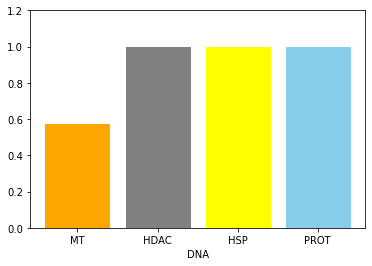

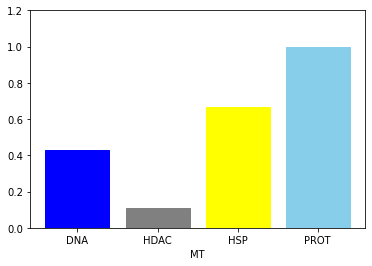

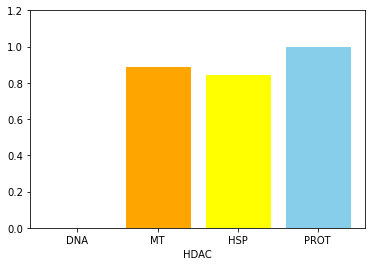

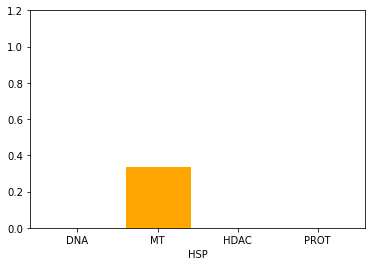

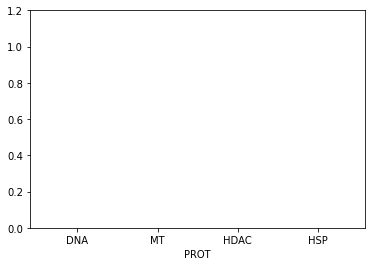

In [ ]:
for i in range(5):
    plot_histogram2(hlst[i],five[i])

In [ ]:
fig = px.line(df, x='year', y='lifeExp', color='country', markers=True)
fig.show()

In [ ]:
import sys
from PIL import Image

images = [Image.open(x) for x in ['/Users/mac/Desktop/pca_knn_cancer_drug/pca_knn/histogram/hist1.png', \
  '/Users/mac/Desktop/pca_knn_cancer_drug/pca_knn/histogram/hist2.png',\
     '/Users/mac/Desktop/pca_knn_cancer_drug/pca_knn/histogram/hist3.png'\
      ,'/Users/mac/Desktop/pca_knn_cancer_drug/pca_knn/histogram/hist4.png',\
        '/Users/mac/Desktop/pca_knn_cancer_drug/pca_knn/histogram/hist5.png']]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

new_im.save('test.jpg')

In [ ]:
import matplotlib.pyplot as plt
def plot_histogram(cnt,label):
    bars = plt.bar([ 'DNA','MT','HDAC','HSP','PROT'], cnt)
    bars[0].set_color('blue')
    bars[1].set_color('orange')
    bars[2].set_color('grey')
    bars[3].set_color('yellow')
    bars[4].set_color('skyblue')
    plt.ylim([0, 1.2])
    plt.xlabel(label)
    plt.show()


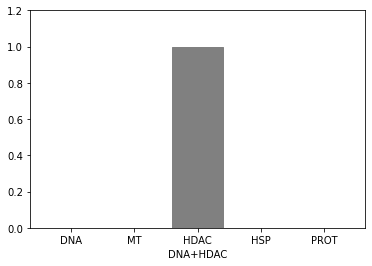

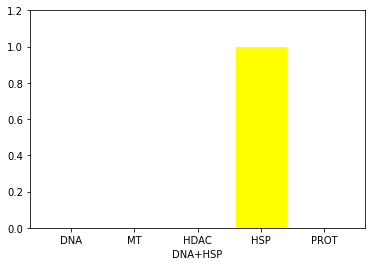

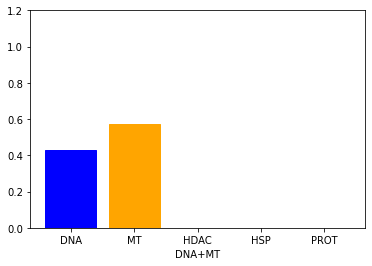

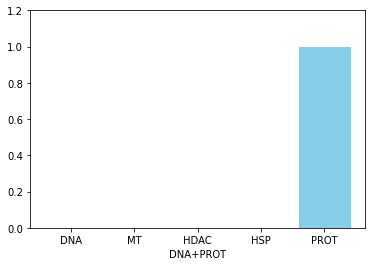

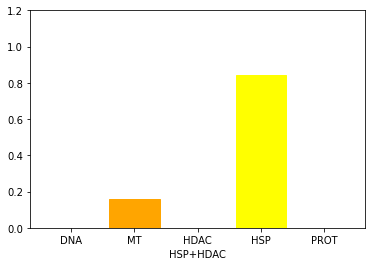

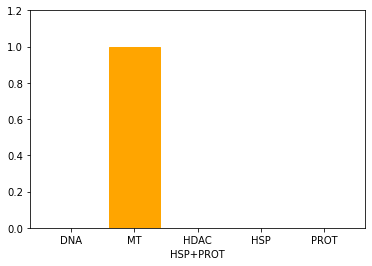

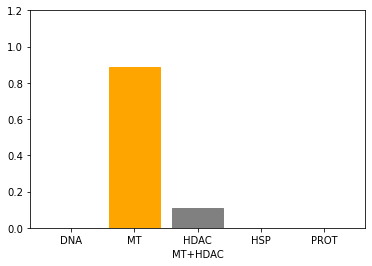

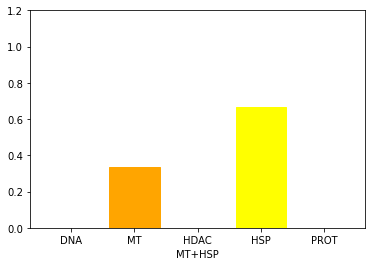

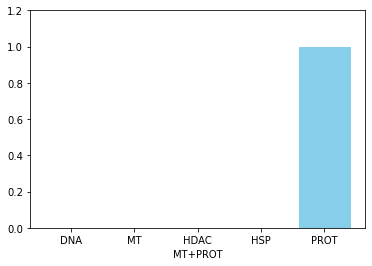

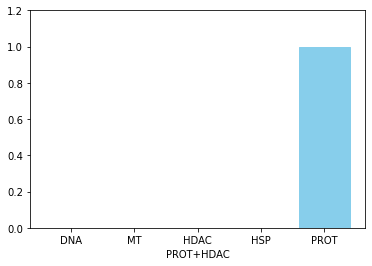

In [ ]:
for i in range(len(label_to_use)):
    plot_histogram(big_cnt[i],label_to_use[i])

In [ ]:
intuitive

[['DNA+HDAC',
  [[['HDAC', 0.25]], [['HDAC', 0.25]], [['HDAC', 0.25]], [['HDAC', 0.25]]]],
 ['DNA+HSP',
  [[['HSP', 0.25]], [['HSP', 0.25]], [['HSP', 0.25]], [['HSP', 0.25]]]],
 ['DNA+MT',
  [[['MT', 0.2857142857142857]],
   [['DNA', 0.14285714285714285]],
   [['MT', 0.2857142857142857]],
   [['DNA', 0.2857142857142857]]]],
 ['DNA+PROT',
  [[['PROT', 0.25]], [['PROT', 0.25]], [['PROT', 0.25]], [['PROT', 0.25]]]],
 ['HSP+HDAC',
  [[['HSP', 0.42105263157894735]],
   [['MT', 0.05263157894736842]],
   [['HSP', 0.42105263157894735]],
   [['MT', 0.10526315789473684]]]],
 ['HSP+PROT',
  [[['MT', 0.2857142857142857]],
   [['MT', 0.2857142857142857]],
   [['MT', 0.21428571428571427]],
   [['MT', 0.21428571428571427]]]],
 ['MT+HDAC',
  [[['MT', 0.4444444444444444]],
   [['MT', 0.4444444444444444]],
   [['HDAC', 0.1111111111111111]]]],
 ['MT+HSP',
  [[['MT', 0.16666666666666666]],
   [['HSP', 0.3333333333333333]],
   [['MT', 0.16666666666666666]],
   [['HSP', 0.3333333333333333]]]],
 ['MT+PROT',


In [ ]:
(1.75+0.875)/3

0.875

In [ ]:
#dna+mt
#4 sets
#32 points
#8 
#first set: mt 60%, dna 40%,    -> 0.6,0.4
#second set: mt 70%, dna 30%


# x%, y%,    <=100%

In [ ]:
#

In [ ]:
#Etoposide, Paclitaxel,saha, 17 aag, mg132, gemcitabine
#vinblastine, apicidin, auy922, ps341
result = pd.concat([DNA,MT,HSP,PROT,HDAC,E_combine,P_combine,S_combine,AAG_combine,M_combine,G_combine,V_combine,A_combine,AUY_combine,DMSO])

len(result)

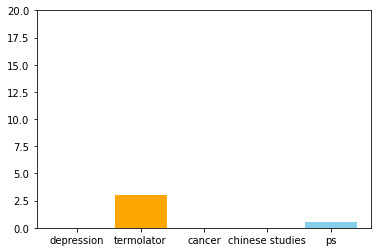

In [4]:
import matplotlib.pyplot as plt
bars = plt.bar(['depression','termolator','cancer','chinese studies','ps'], [0,3,0,0,0.5])
bars[0].set_color('blue')
bars[1].set_color('orange')
bars[2].set_color('grey')
bars[3].set_color('yellow')
bars[4].set_color('skyblue')
plt.ylim([0, 20])


plt.show()